# Bool
закодировать
# Questions
result_name оставить нул?

# Импорт основных библиотек и датасета

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# graph
import networkx as nx
from pyvis.network import Network

In [2]:
PATHES = ["./with_closed_ations_as________select_app_2018_X5_STORES.csv", "./with_closed_ations_as________select_app_2019_X5_STORES.csv", "./with_closed_ations_as________select_app_2020_X5_STORES.csv"]
# df = pd.read_csv(PATH)
df = pd.DataFrame()
for path in PATHES:
    df1 = pd.read_csv(path)
    df = pd.concat([df, df1])
    
df['action_date'] = pd.to_datetime(df['action_date'])
df = df[df['position_name'] == 'Продавец-кассир']

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# изменение bool значений

In [3]:
df["is_active_action"] = df.is_active_action.replace({True: 1, False: 0})
df["is_open_action"] = df.is_open_action.replace({True: 1, False: 0})
df

,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action
0,3080432,2883423,-1,9044,2018-10-16 18:11:10.003180+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
1,2873477,2761171,-1,32087,2018-08-15 10:36:32.936322+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
2,2896621,2776555,-1,32087,2018-08-22 14:09:27.083354+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
3,2906437,2782282,-1,32087,2018-08-24 15:55:27.912704+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
4,2965200,2816229,-1,32087,2018-09-11 15:00:49.242929+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0
...,...,...,...,...,...,...,...,...,...,...,...
739675,4825142,2952699,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739676,4736341,936507,-1,32061,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739678,4782853,2753502,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1
739679,4769924,3823657,-1,32110,2020-04-23 16:26:11.809180+00:00,Не прошел СБ,Вывести из черного списка,NaN,Продавец-кассир,1,1


# Статистика

In [4]:
df = df[df['is_active_action'] == 1]

In [5]:
from functools import singledispatch
@singledispatch
def toDays(time_delta):
    return time_delta
@toDays.register
def _(time_delta: pd.Timedelta):
    return time_delta.total_seconds()/60/60/24
@toDays.register
def _(time_delta: pd.Series):
    return time_delta.dt.total_seconds()/60/60/24

In [6]:
# Сортируем по аппликантам и по времени
df.sort_values(by=['id_applicant','action_date'], ascending = [False,True], inplace = True)
df.reset_index(drop = True, inplace = True)

# action_time
indexes = pd.RangeIndex(len(df) - 1)
df['action_time'] = toDays(df.iloc[indexes + 1]['action_date'].reset_index(drop = True) - df['action_date']) # In days
df['action_time'].iloc[df[df['id_applicant'] !=  df.iloc[indexes+1].append({'id_applicant': 0}, ignore_index = True)['id_applicant'].reset_index(drop = True)].index] = None

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [7]:
df['is_fits'] = 0
df.loc[df['result_name'] == 'Принят', 'is_fits'] = 1
df['is_fits'].mean()

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0.018807529887609212

In [8]:
applicants_fits =  df.groupby(['id_applicant'])['is_fits'].sum()
applicants_fits.describe()

count    1.733977e+06
mean     1.161053e-01
std      3.206698e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: is_fits, dtype: float64

In [9]:
df['id_applicant'][df['id_applicant'].isin(applicants_fits[applicants_fits > 2].index)].unique()
# Очень странные значения!!! Когда два раза принимают там в основном второе оформление - после выхода на работу
# Можете смотреть тут
# df[df['id_applicant'].isin([4041842])]

array([2859958], dtype=int64)

In [10]:
df_fits = df[df['id_applicant'].isin(applicants_fits[applicants_fits > 0].index)].reset_index()
df_fits = df_fits[df_fits['is_active_action'] == 1]
df_fits.describe()

,index,id_applicant,id_partner,id_log,department_id,is_active_action,is_open_action,action_time,is_fits
count,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2.400247e+06,2400247.0,2.400247e+06,2.199099e+06,2.400247e+06
mean,5.329407e+06,3.280235e+06,2.709437e+06,1.577098e+07,2.203810e+04,1.0,6.249357e-06,1.191580e+00,8.387637e-02
std,2.899277e+06,6.037361e+05,6.683275e+05,5.887423e+06,1.214382e+04,0.0,2.499864e-03,7.970328e+00,2.772024e-01
min,0.000000e+00,2.196746e+06,5.305870e+05,-1.000000e+00,5.637000e+03,1.0,0.000000e+00,1.396991e-08,0.000000e+00
25%,2.808272e+06,2.775263e+06,2.497976e+06,1.347877e+07,1.008500e+04,1.0,0.000000e+00,1.080026e-05,0.000000e+00
50%,5.312441e+06,3.290447e+06,2.818420e+06,1.643617e+07,2.406800e+04,1.0,0.000000e+00,9.651384e-05,0.000000e+00
75%,7.814420e+06,3.759099e+06,3.181783e+06,1.967039e+07,3.217700e+04,1.0,0.000000e+00,7.662988e-01,0.000000e+00
max,1.070443e+07,4.886615e+06,3.897229e+06,2.710603e+07,4.985900e+04,1.0,1.000000e+00,8.111587e+02,1.000000e+00


In [11]:
len(df_fits['id_applicant'].unique())

201148

In [12]:
df_fits['Date_int'] = df_fits['action_date'].values.astype('int64')
partner_applicant =  df_fits.groupby(['id_partner','id_applicant'])['Date_int'].max().reset_index()
amount_applicant =  partner_applicant.groupby(['id_partner'])['Date_int'].max().reset_index()
partner_applicant = partner_applicant[partner_applicant['Date_int'].isin(amount_applicant['Date_int'])]
df_fits = pd.DataFrame(df_fits).drop(columns = 'Date_int')

df_fits = df_fits[df_fits['id_applicant'].isin(partner_applicant['id_applicant'])].reset_index(drop = True)

In [13]:
len(df_fits['id_applicant'].unique())

193767

In [14]:
# applicant_min =  df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
fits_max =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].max().reset_index()
fits_max

# unused for now
# new_tth = pd.DataFrame(applicant_min).drop(columns = 'action_date')
# new_tth['tth'] = toDays(fits_min['action_date'] - applicant_min['action_date'])

,id_applicant,action_date
0,2196746,2018-02-01 23:04:53.450437+00:00
1,2196747,2018-01-11 09:51:21.213384+00:00
2,2196748,2018-02-02 12:41:49.992103+00:00
3,2196752,2018-01-22 11:43:14.342473+00:00
4,2196753,2018-01-15 10:32:20.674998+00:00
...,...,...
193762,4886560,2020-04-14 11:04:44.553692+00:00
193763,4886575,2020-04-14 11:06:42.313671+00:00
193764,4886579,2020-04-14 11:07:06.756809+00:00
193765,4886599,2020-04-14 11:08:17.306195+00:00


In [15]:
df_fits.loc[df_fits['action_date'].isin(fits_max['action_date']) & (df_fits['action_time'].notna()), 'after_fit'] = 1
while True:
    after_indexes = df_fits[(df_fits['action_time'].notna())& (df_fits['after_fit'] == 1)].index
    after_fit_mask = (df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna())) & df_fits['after_fit'].isna()
    print(len(df_fits.loc[after_fit_mask]))
    if len(df_fits.loc[after_fit_mask]) == 0:
        break
    df_fits.loc[after_fit_mask, 'after_fit'] = 1

244
201
186
172
159
153
70
26
16
16
14
14
10
9
0


In [16]:
# partner_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  partner_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# partner_applicant.set_index('id_partner', inplace = True)
# amount_applicant[amount_applicant['id_applicant']>2]

# amount_applicant['id_partner'][amount_applicant['id_applicant']>2].array

In [17]:
# df_fits.loc[df_fits.index.isin(after_indexes + 1) & (df_fits['action_time'].notna()),'after_fit'] = 1
# ['after_fit']

In [18]:
df_fits.loc[df_fits['after_fit'] == 1, 'action_time'] = 0

In [19]:
df_fits[df_fits['id_applicant']== 4886560]

,index,id_applicant,id_partner,id_log,department_id,action_date,stage_name,activity_name,result_name,position_name,is_active_action,is_open_action,action_time,is_fits,after_fit
40,140,4886560,1197774,-1,35106,2020-04-14 11:04:14.792897+00:00,Создание кандидата,NaN,NaN,Продавец-кассир,1,0,0.000194,0,NaN
41,141,4886560,1197774,27105772,35106,2020-04-14 11:04:31.540786+00:00,Обработка,Провести первичную обработку,Подходит,Продавец-кассир,1,0,0.000014,0,NaN
42,142,4886560,1197774,27105774,35106,2020-04-14 11:04:32.775293+00:00,Обработка,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,NaN
43,143,4886560,1197774,27105775,35106,2020-04-14 11:04:34.239576+00:00,Интервью с руководителем,Назначить интервью с руководителем,Встреча назначена,Продавец-кассир,1,0,0.000014,0,NaN
44,144,4886560,1197774,27105777,35106,2020-04-14 11:04:35.442680+00:00,Интервью с руководителем,Узнать результаты интервью с руководителем,Подходит,Продавец-кассир,1,0,0.000013,0,NaN
45,145,4886560,1197774,27105778,35106,2020-04-14 11:04:36.590168+00:00,СБ,Подготовить анкету кандидата,Подготовлена,Продавец-кассир,1,0,0.000011,0,NaN
46,146,4886560,1197774,27105779,35106,2020-04-14 11:04:37.511006+00:00,СБ,Узнать результаты СБ,Подходит,Продавец-кассир,1,0,0.000015,0,NaN
47,147,4886560,1197774,27105781,35106,2020-04-14 11:04:38.764145+00:00,СБ,Проверка формы обращения,Не резерв,Продавец-кассир,1,0,0.000017,0,NaN
48,148,4886560,1197774,27105783,35106,2020-04-14 11:04:40.266221+00:00,Оформление,Назначить время на оформление,Время назначено,Продавец-кассир,1,0,0.000050,0,NaN
49,149,4886560,1197774,27105784,35106,2020-04-14 11:04:44.553692+00:00,Оформление,Узнать результаты приема,Принят,Продавец-кассир,1,0,NaN,1,NaN


In [20]:
applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum()
applicants_g.describe()

count    193767.000000
mean         13.005490
std          26.229788
min           0.000000
25%           4.304742
50%           7.926343
75%          14.194359
max         811.159243
Name: action_time, dtype: float64

In [21]:
# applicants_g =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time', 'is_fits'].sum()
# applicants_g[applicants_g['is_fits']>0].describe()

In [22]:
# applicants_g[applicants_g['is_fits']==0].describe()

In [23]:
# df['action_time'][df['action_time'] < 0] = None
stage_threshold = 0
stages_g =  df_fits.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g[stages_g['count'] > stage_threshold]

,count,mean,std,min,25%,50%,75%,max
stage_name,,,,,,,,
Выход на работу,156.0,1.092758,2.533857,0.000000,0.000000,0.004903,1.224158,21.760230
Гайд-интервью,4.0,0.000011,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013
Групповое собеседование и тестирование,6.0,0.000010,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013
Интервью с руководителем,470750.0,0.563862,9.275355,0.000000,0.000008,0.000011,0.000015,811.158711
Кадровый резерв,4.0,0.000013,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030
Мы отказали,22.0,0.308741,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035
Назначение времени на оформление/медосмотр,205262.0,2.588660,6.868024,0.000000,0.000112,0.815712,3.013660,433.256890
Не прошел СБ,382.0,0.022709,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623
Обработка,348531.0,0.172193,6.452844,0.000000,0.000009,0.000011,0.000014,565.056308


In [24]:
activity_threshold = 0
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g[activities_g['count'] > activity_threshold]

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000022,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.241734,5.549731e+00,0.000000,0.000132,0.226812,2.831923,433.256890
Назначить время на оформление/медосмотр (недозвон),124348.0,2.979320,7.469298e+00,0.000000,0.000076,0.828630,3.230943,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.626637,9.179090e+00,0.000000,0.000009,0.000011,0.000015,811.158711
Подготовить анкету кандидата,220390.0,1.376653,1.224314e+01,0.000000,0.000013,0.175961,0.832853,527.944208


In [25]:
result_threshold = 0
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
results_g[results_g['mean'] > 1]

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В ожидании,153482.0,3.158289,5.908128,0.000000,1.016673,1.918097,3.894268,520.710384
Время назначено,191517.0,1.840695,4.353546,0.000000,0.000073,0.000276,2.811733,291.880512
Кадровый резерв,197.0,1.882064,7.805397,0.000008,0.000009,0.000011,0.000013,72.072166
Направлен на медосмотр,7438.0,4.059084,6.214250,0.000035,1.740861,2.116287,4.021579,148.137375
Не подходит,454.0,30.973591,49.373907,0.000021,9.190021,17.501866,32.610084,467.791808
Не получено,24.0,1.907678,2.560172,0.007971,0.077342,0.760203,2.788345,9.012896
Не принят,14.0,25.042870,38.841320,0.000000,7.308831,13.095907,28.450503,154.034348
Недозвон,143693.0,3.380745,9.124365,0.000000,0.249755,1.027225,3.153722,561.365339
Нет обратной связи,22849.0,3.343687,20.052129,0.000000,0.176681,0.923860,1.996873,532.894660


# Обнуляем время в результатах без предсказуемой последующей обработки

In [26]:
# Недозвон? Нет обратной связи? Ожидание?
results_empty = ['Резерв', 'Не подходит', 'Не принят', 'Отказ кандидата', 'Отказ руководителя', 'Принят', 'Кадровый резерв']
for res in results_empty:
    df_fits.loc[(df_fits['result_name'] == res) & df_fits['action_time'].notna(), 'action_time'] = 0
    
df_fits.loc[(df_fits['stage_name'] == 'Создание кандидата') & df_fits['action_time'].notna(), 'action_time'] = 0

In [27]:
df_tth =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'id_partner', 'department_id'])['action_time'].sum().reset_index()
df_tth.rename(columns={"action_time": "TTH"}, inplace = True)
# df_tth['TTH'].to_excel('TTH.xlsx')
# df_tth = pd.merge(df_tth, df_fits[['id_applicant', 'id_partner']], how = 'right', on="id_applicant")
# df_tth = df_tth.join(df_fits.set_index('id_applicant')['id_partner'], on='id_applicant')
df_tth

,id_applicant,id_partner,department_id,TTH
0,2196746,2393754,6715,27.685659
1,2196747,2314693,12252,6.133310
2,2196748,2346300,5760,28.251127
3,2196752,2393757,32391,17.202996
4,2196753,2393758,32156,10.153854
...,...,...,...,...
193762,4886560,1197774,35106,0.000151
193763,4886575,1542748,28162,0.000176
193764,4886579,3878216,10530,0.000182
193765,4886599,3884467,48259,0.000218


In [28]:
df_tth_dep =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'department_id'])['action_time'].count().reset_index()
# df_tth_dep = df_tth_dep.join(df_tth.set_index('id_applicant'), on='id_applicant')
# df_tth_dep = pd.merge(df_tth_dep, df_tth[['id_applicant','action_time']], how = 'left', on="id_applicant")
df_tth_dep = df_tth_dep.groupby(['department_id']).agg({'id_applicant':'count', 'action_time':'median'}).reset_index()
# df_tth_dep.to_excel('TTH_DEP.xlsx')
df_tth_dep.rename(columns={"id_applicant": "applicants","action_time": "TTH_median"}, inplace = True)
df_tth_dep

,department_id,applicants,TTH_median
0,5637,10,9.5
1,5638,4,9.0
2,5639,20,12.0
3,5640,6,12.5
4,5641,8,9.0
...,...,...,...
15545,49707,2,13.5
15546,49711,9,9.0
15547,49722,5,9.0
15548,49734,2,9.0


In [29]:
df_fits['place'] = range(0, len(df_fits))
df_places = df_fits.groupby(['id_applicant'])['place'].min().reset_index()
df_places = df_places.rename(columns={"place": 'place_min'})
df_fits = pd.merge(df_fits, df_places, how = 'left', on="id_applicant")
df_fits['place'] = df_fits['place'] - df_fits['place_min']
df_fits = df_fits.drop(['place_min'] , axis=1)

In [30]:
from sklearn.ensemble import IsolationForest

print(len(df_tth['id_partner'].unique()))
print(len(df_tth['id_applicant'].unique()))
forest_model=IsolationForest(random_state=0, contamination=.01).fit(df_tth[['TTH']])
df_tth['anomaly'] = forest_model.predict(df_tth[['TTH']])
df_tth
# df_fits

193767
193767


C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


,id_applicant,id_partner,department_id,TTH,anomaly
0,2196746,2393754,6715,27.685659,1
1,2196747,2314693,12252,6.133310,1
2,2196748,2346300,5760,28.251127,1
3,2196752,2393757,32391,17.202996,1
4,2196753,2393758,32156,10.153854,1
...,...,...,...,...,...
193762,4886560,1197774,35106,0.000151,1
193763,4886575,1542748,28162,0.000176,1
193764,4886579,3878216,10530,0.000182,1
193765,4886599,3884467,48259,0.000218,1


In [31]:
def SetTTHLabels(table_name = 'TTH'):
    ax.set_title(table_name)
    ax.set_xlabel('TTH (Дни)')
    ax.set_ylabel('Количество')

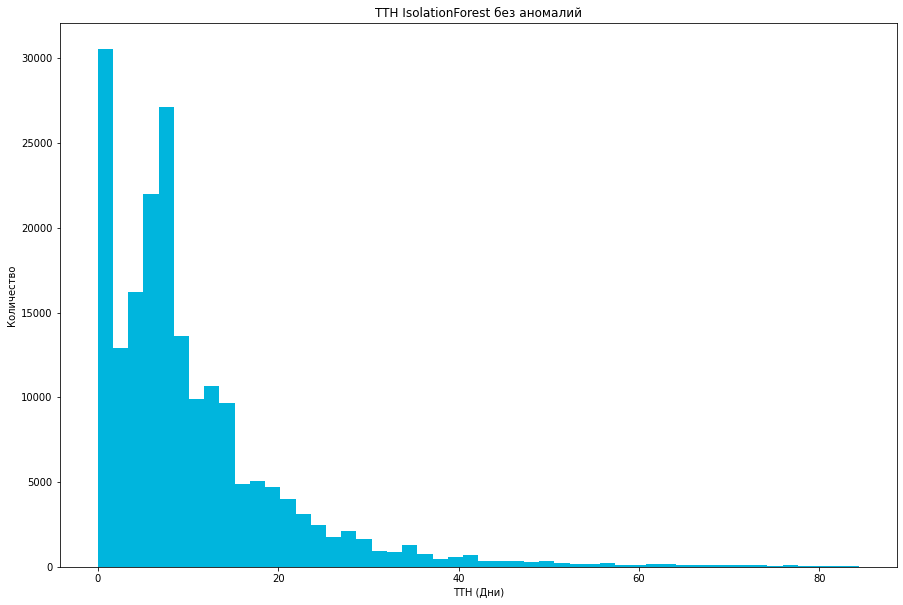

In [32]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 50
ax.hist(df_tth['TTH'][(df_tth['anomaly']==1)&(df_tth['TTH']<1000)],bins=bins, color = "#00b5dd")
SetTTHLabels('TTH IsolationForest без аномалий')
plt.show()

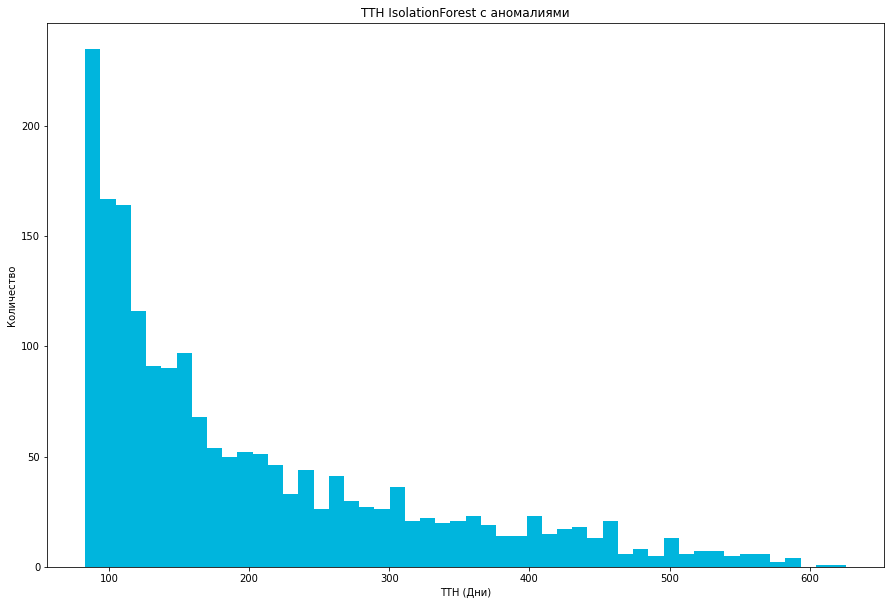

In [33]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 50
ax.hist(df_tth['TTH'][(df_tth['anomaly']==-1)&(df_tth['TTH']<1000)],bins=bins, color = "#00b5dd")
SetTTHLabels('TTH IsolationForest с аномалиями')
plt.show()

In [34]:
# Запускать один раз!
treshold_down = 0.02
treshold_up = df_tth['TTH'].quantile(0.99)
print("Верхняя граница = "+ str(treshold_up))
df_fits = pd.merge(df_fits, df_tth[['id_applicant', 'TTH']], how = 'left', on="id_applicant")
df_tth = pd.DataFrame(df_tth).drop(columns = 'anomaly')

df_tth_norm = df_tth[(df_tth['TTH']<treshold_up)&(df_tth['TTH']>treshold_down)]
df_tth_small = df_tth[(df_tth['TTH']<treshold_down)]

df_norm = df_fits[(df_fits['TTH']<treshold_up)&(df_fits['TTH']>treshold_down)]
df_small = df_fits[(df_fits['TTH']<treshold_down)]

Верхняя граница = 82.14418599830046


In [35]:
print("Количество норм аппликантов = "+ str(len(df_norm.id_applicant.unique())))
print("Количество коротких аппликантов = "+ str(len(df_small.id_applicant.unique())))

Количество норм аппликантов = 164139
Количество коротких аппликантов = 27690


In [36]:
df_norm.groupby(['result_name'])['place'].mean().sort_values()

result_name
Источник не Яндекс Цифра                    2.108708
Источник Яндекс Цифра                       2.120000
Кадровый резерв                             2.476684
Встреча назначена                           4.038304
Перенос руководителя                        4.515152
Подходит                                    4.881789
Перенос кандидата                           4.896790
Нет обратной связи                          5.233315
Не подготовлена                             5.400000
Не подходит                                 5.784653
Согласование повторного приема              5.875328
Уточнение данных                            6.121457
Подготовлена                                6.144061
Резерв                                      6.183168
Перенос звонка                              6.260198
Не получено                                 6.375000
Не резерв                                   6.539198
Интервью с руководителем                    6.744344
Получено                          

In [37]:
df_norm.groupby(['stage_name'])['place'].mean().sort_values()

stage_name
Создание кандидата                             0.063818
Обработка                                      2.116766
Интервью с руководителем                       4.612648
Не прошел СБ                                   6.848024
СБ                                             7.146359
Резерв                                         7.153439
Кадровый резерв                                8.000000
Назначение времени на оформление/медосмотр     8.297590
Смена вакансии                                 9.397790
Мы отказали                                    9.863636
Ожидание                                      10.083333
Оформление                                    10.373303
Отказался                                     11.350000
Выход на работу                               11.402390
Name: place, dtype: float64

In [38]:
df_norm.groupby(['activity_name'])['place'].mean().sort_values()

activity_name
Провести первичную обработку                                 1.029477
Проверка источника                                           2.116136
Назначить интервью с руководителем                           4.041110
Узнать результаты интервью с руководителем                   5.134337
Подготовить анкету кандидата                                 6.140460
Проверка формы обращения                                     6.534916
Получить согласование повторного приема и отправить в СБ     6.910941
Вывести из черного списка                                    7.000000
Узнать результаты СБ                                         7.161871
Назначить время на оформление                                7.403801
Предоставить обратную связь по кандидату                     8.703284
Назначить время на оформление/медосмотр                      8.730692
Назначить время на оформление/медосмотр (недозвон)           8.964395
Узнать результаты медосмотра                                 9.757760
Вернут

In [39]:
def vizScatTTH(df, xColumns, yColumn,  x_c, y_c):
    fig, axs = plt.subplots( y_c, x_c, figsize=(15,15))
    df = df[df[yColumn] <82]
    i = 0
    for column in xColumns:
        x = int(i / x_c)
        y = i % x_c    
        axs[x,y].set_ylabel("TTH")
        axs[x,y].set_xlabel(column)
        axs[x,y].scatter(df[column],df[yColumn],s=3, label="original")
        i += 1
    plt.show()

def columnDiscraber(df, column_name, x_col, y_col):
    activites =  df.groupby([column_name])['place'].mean().sort_values().reset_index()[column_name].values

    df_activity_mean = df.groupby([column_name, 'id_applicant'])['action_time'].mean().sort_values().reset_index()
    df_activity_mean = df_activity_mean.loc[df_activity_mean[column_name].isin(activites)]

    temp_df = pd.get_dummies(df_activity_mean[column_name]).rename(columns=lambda x: str(x))
    df_activity_mean =  pd.concat((df_activity_mean, temp_df), axis=1)

    for activity in activites:
        df_activity_mean.loc[df_activity_mean[activity]==1, activity] = df_activity_mean['action_time'] 
    df_activity_mean.fillna(0)
    df_activity_mean = df_activity_mean.groupby(['id_applicant']).sum().reset_index()
    df_activity_mean = df_activity_mean.rename(columns={"action_time": 'TTH'})
    vizScatTTH(df_activity_mean, activites,'TTH', x_col, y_col)

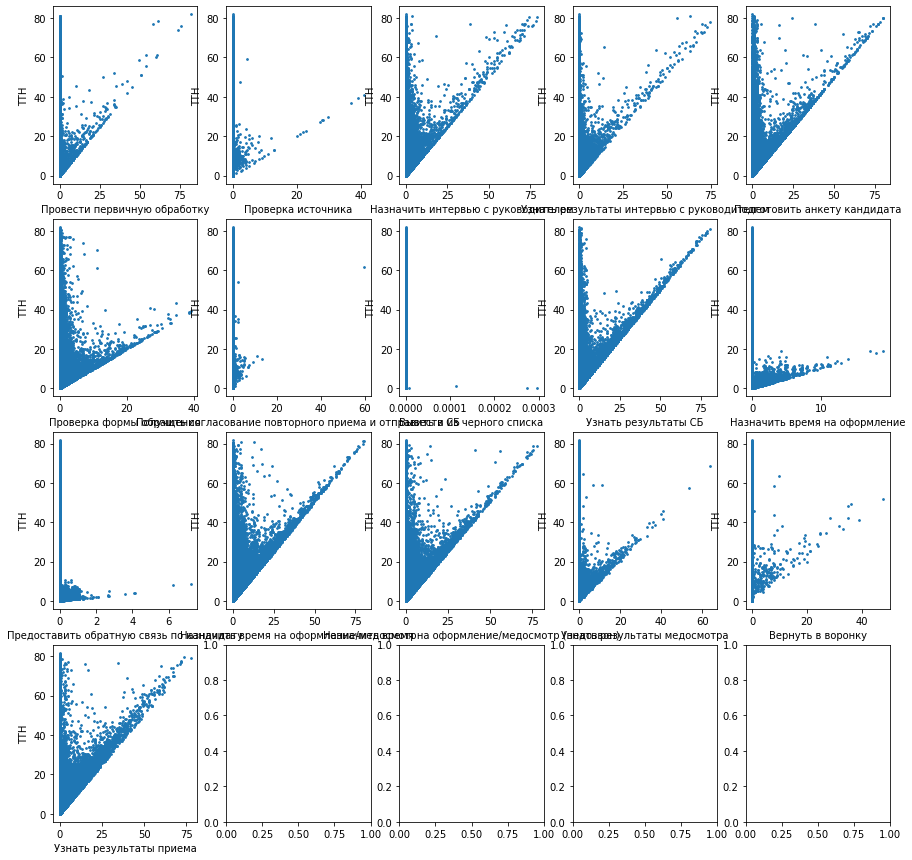

In [40]:
columnDiscraber(df_norm, 'activity_name', 5, 4)

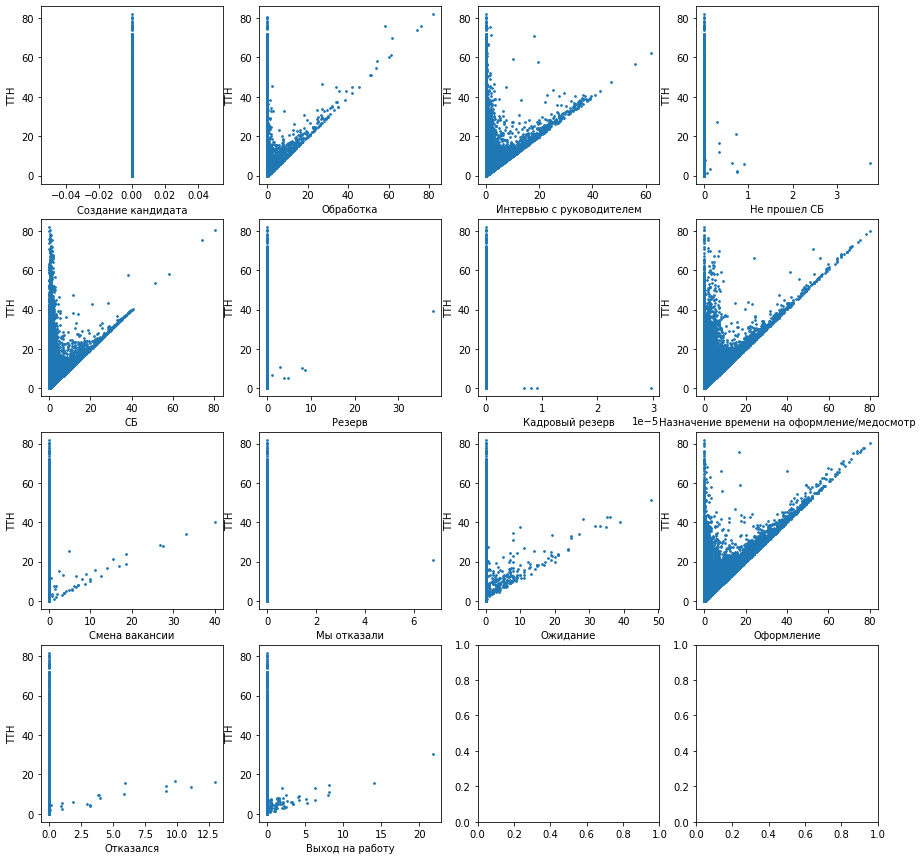

In [41]:
columnDiscraber(df_norm, 'stage_name', 4, 4)

In [42]:
# df_norm[df_norm['activity_name'] == 'Назначить время на оформление/медосмотр']
# df_test_g = df_norm[df_norm['activity_name'] == 'Назначить время на оформление/медосмотр'].groupby(['id_applicant','activity_name']).index.count().reset_index()
# df_test_g[df_test_g['index']>2]

In [43]:
def dfAllDays(df):
    date_min = df['action_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
    day_max = int(toDays(df['action_date'].max() - date_min)) + 1 # In days
    range_days = range(0, day_max)
    return pd.DataFrame(range_days, range_days, columns =['days']) 
    
    
    
def stageInDays(stage_action_name, df, show_scatter = True, up_date_treshold = 730, applicants = False):
    stage_date = df[df['stage_name'] == stage_action_name].groupby(['id_applicant'])['action_date'].max().reset_index()
    stage_date = df.loc[df['action_date'].isin(stage_date['action_date']), ['id_applicant','action_date','action_time']]
    stage_date = stage_date.rename(columns={"action_date": 'max_date'})
    stage_date = pd.merge(stage_date,df[df['stage_name'] == stage_action_name].groupby(['id_applicant'])['action_date'].min().reset_index(), how = 'left', on="id_applicant")
    stage_date = stage_date.rename(columns={"action_date": 'min_date'})

    date = stage_date['min_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
#     date_20 = stage_date['min_date'].min().tzinfo.localize(pd.to_datetime(20200101, format='%Y%m%d'))
#     print(toDays(date_20 - date))# - toDays(stage_date['min_date'].min() - date))
    
    stage_date['stage_time_min'] = (toDays(stage_date['min_date'] - date)).astype(int) # In days
    stage_date['stage_time_max'] = (toDays(stage_date['max_date'] - date)).astype(int) # In days
#     stage_date.sort_values(by=['stage_time_min'], ascending=[False])

    applicant_days = dfAllDays(df)
    applicant_days['applicants'] = 0
    for cur_date in applicant_days['days']:
        applicant_days.loc[cur_date,'applicants'] = len(stage_date[(stage_date['stage_time_max']>= cur_date)&(stage_date['stage_time_min']<= cur_date)])
        
    applicant_days = applicant_days[applicant_days['days'] < up_date_treshold]
    
    stage_date = pd.merge(stage_date, applicant_days.rename(columns={"days": 'stage_time_min'}), how = 'left', on="stage_time_min")
    if show_scatter:
        plt.subplots(figsize=(15,10))
        plt.scatter(applicant_days['days'], applicant_days['applicants'], linewidth=1, label="original",s=5)
        plt.title("Стадия "+ stage_action_name)
        plt.xlabel('Дни с начала 2018 года')
        plt.ylabel('Количество аппликантов на стадии')
        plt.grid(True)
        plt.show()
    if applicants:
        return applicant_days
    else:
        return stage_date

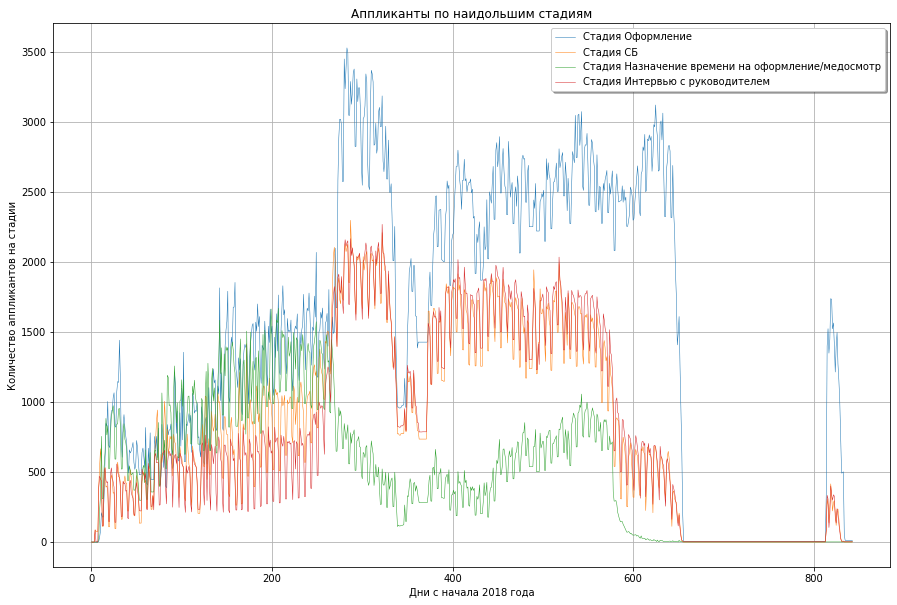

In [44]:
long_stages = ['Оформление', 'СБ', 'Назначение времени на оформление/медосмотр', 'Интервью с руководителем']
# for stage in long_stages:
#     stageInDays(stage, df_norm, True, 9999)
df_long_stages = dfAllDays(df_norm)

plt.subplots(figsize=(15,10))
for stage in long_stages:
    df_long_stage = stageInDays(stage, df_norm, False, 9999, True)
    df_long_stages = pd.merge(df_long_stages, df_long_stage, how = 'left', on="days") 
    new_col_name = stage+ ' аппликатнов'
    df_long_stages =  df_long_stages.rename(columns={"applicants": new_col_name})
    plt.plot(df_long_stages['days'], df_long_stages[new_col_name], label="Стадия " + stage, linewidth=0.5)
#     ,s=1, linewidth=1
    
plt.title("Аппликанты по наидольшим стадиям")
plt.xlabel('Дни с начала 2018 года')
plt.ylabel('Количество аппликантов на стадии')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
# df_long_stages.to_excel('LONG_STAGES.xlsx')
# df_long_stages

In [45]:
df_long_stages.sort_values(by =['days'])

,days,Оформление аппликатнов,СБ аппликатнов,Назначение времени на оформление/медосмотр аппликатнов,Интервью с руководителем аппликатнов
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,0
3,3,0,0,0,0
4,4,0,87,0,87
...,...,...,...,...,...
839,839,12,0,1,3
840,840,12,0,1,3
841,841,12,0,1,3
842,842,12,0,1,3


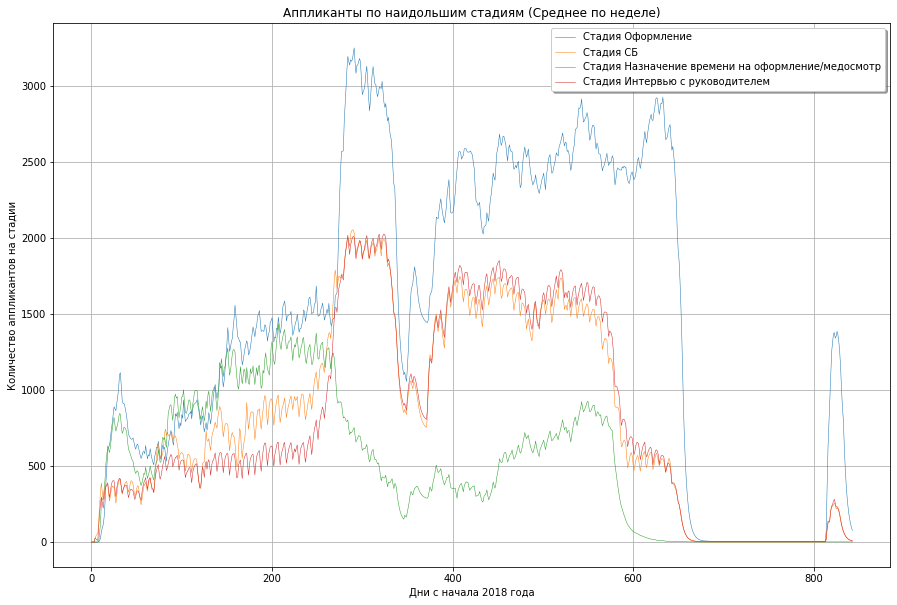

In [46]:
mask = np.isin(df_long_stages.columns, ['days'], invert = True)
df_long_stages_col = df_long_stages.columns[mask]
df_long_stages[df_long_stages_col] = df_long_stages[df_long_stages_col].ewm(com=3.5).mean()

plt.subplots(figsize=(15,10))
for stage in long_stages:
    new_col_name = stage+ ' аппликатнов'
    df_long_stages =  df_long_stages.rename(columns={"applicants": new_col_name})
    plt.plot(df_long_stages['days'], df_long_stages[new_col_name], label="Стадия " + stage, linewidth=0.5)
#     ,s=1, linewidth=1
    
plt.title("Аппликанты по наидольшим стадиям (Среднее по неделе)")
plt.xlabel('Дни с начала 2018 года')
plt.ylabel('Количество аппликантов на стадии')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

# df_long_stages.to_excel('LONG_STAGES_MEAN(week).xlsx')

In [47]:
df_long_stages.sort_values(by =['days'])

,days,Оформление аппликатнов,СБ аппликатнов,Назначение времени на оформление/медосмотр аппликатнов,Интервью с руководителем аппликатнов
0,0,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000,0.000000
4,4,0.000000,27.025567,0.000000,27.025567
...,...,...,...,...,...
839,839,188.595462,16.062777,1.000000,17.844744
840,840,149.352026,12.493271,1.000000,14.545912
841,841,118.829353,9.716988,1.000000,11.980154
842,842,95.089497,7.557658,1.000000,9.984564


In [48]:
date_min = df_norm['action_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_norm['days'] = (toDays(df_norm['action_date'] - date_min)).astype(int)  
df_norm = pd.merge(df_norm, df_long_stages, how = 'left', on="days")
# df_fits.sort_values(by =['days'])

C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
def addTimeToDF(df, column_name, result_name, new_res_name, temp):
    temp = df[df[column_name]==result_name]
    temp = temp.dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].sum().reset_index()
    temp = temp.rename(columns={"action_time": new_res_name})
    df = pd.merge(df, temp, how = 'left', on="id_applicant")
    df.fillna(value = {new_res_name:0}, inplace = True)
    return df
def dfMeanTime(df, column_name, result, result_new_name):
    df_mean = df[df[column_name]==result].groupby(['id_applicant'])['action_time'].mean().reset_index()
    df_mean = df_mean.rename(columns={"action_time": result_new_name})
    return df_mean
def dfRepitable(df, column_name, result_name, new_result_name):
    temp_df = df_norm[df_norm[column_name]==result_name].groupby(['id_applicant', 'activity_name', 'stage_name'])['action_date'].count().reset_index()
    temp_df = temp_df.rename(columns={"action_date": "amount"})
    temp_df = temp_df[temp_df['amount']>1]
    df = pd.merge(df, temp_df.groupby(['id_applicant'])['amount'].sum(), how = 'left', on="id_applicant")
    df = df.rename(columns={"amount": "amount_over_2calls"})
    df = pd.merge(df, temp_df.groupby(['id_applicant'])['amount'].count(), how = 'left', on="id_applicant")
    df = df.rename(columns={"amount": "count_over_2calls"})
    df['mean_over_2calls'] = df['amount_over_2calls'] / df['count_over_2calls'] - 1
    df[df['mean_over_2calls'] == -1] = 0
    df = df.drop(['amount_over_2calls', 'count_over_2calls'] , axis=1)
    df = df.rename(columns={"mean_over_2calls": new_result_name})
    return df

In [128]:
fits_min =  df_norm[df_norm['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].min().reset_index()

In [144]:
# Был ли чел в резерве
temp_df = df[df['stage_name']=='Резерв'].id_partner.unique()
df_reg = df_tth_norm.reset_index(drop=True)
# df_reg['Reserv'] = 0
# df_reg.loc[df_reg['id_partner'].isin(temp_df), 'Reserv']= 1

# Сезонность? (В какой месяц?) - 11 бинарных переменных
df_reg = pd.merge(df_reg, fits_min[['id_applicant','action_date']], how = 'left', on="id_applicant")
df_reg['month_start'] = df_reg['action_date'].dt.month
# df_reg['year_start'] = df_reg['action_date'].dt.year - 2018
df_reg = df_reg.drop(['action_date'] , axis=1)

temp_df = pd.get_dummies(df_reg["month_start"]).rename(columns=lambda x: 'month '+str(int(x)))
# temp_df = pd.concat((pd.get_dummies(df_reg["year_start"]).rename(columns=lambda x: 'year '+str(int(x))),temp_df), axis=1)
df_reg =  pd.concat((temp_df, df_reg), axis=1)
df_reg = df_reg.drop(['month_start'] , axis=1)
# df_reg = df_reg.drop(['year_start'] , axis=1)

# Департаменты? (количество нанятых в департаменте)
# df_reg = pd.merge(df_reg, df_tth_dep[['department_id','applicants']], how = 'left', on="department_id")
# df_reg = df_reg.rename(columns={"applicants": "dep_applicants"})

# Узнать результаты интервью с руководителем (Время) / Нет обратной связи (От руководителя) - ожидание
#  Узнать результаты интервью с руководителем
# df_reg = addTimeToDF(df_reg, 'activity_name','Узнать результаты интервью с руководителем', "interview_result_time", temp_df)
#  Нет обратной связи от руководителя
# df_reg = addTimeToDF(df_reg, 'result_name','Нет обратной связи от руководителя', "no_interview_info_time", temp_df)
#  Узнать результаты интервью с руководителем
# df_reg = addTimeToDF(df_reg, 'stage_name','Оформление', "oform_time", temp_df)

# Источник Яндекс цифра
df_reg['yandex_source'] = 0
# yandex_source id_applicants
temp_df = df.loc[df['result_name']=='Источник Яндекс Цифра', 'id_applicant'].unique() 
df_reg.loc[df_reg['id_applicant'].isin(temp_df), 'yandex_source'] = 1

# Сколько раз повторяются этапы на стадии (activity + stage name)
df_reg = dfRepitable(df_reg,'stage_name','Интервью с руководителем', 'Интервью недозвоны' )
df_reg = dfRepitable(df_reg,'stage_name','Оформление', 'Оформление недозвоны' )
df_reg = dfRepitable(df_reg,'stage_name','СБ', 'СБ недозвоны' )
df_reg = dfRepitable(df_reg,'stage_name','Назначение времени на оформление/медосмотр', 'Медосмотр недозвоны' )
df_reg = dfRepitable(df_reg,'stage_name','Обработка', 'Обработка недозвоны' )
# temp_df = df_norm[df_norm['stage_name']=='Интервью с руководителем'].groupby(['id_applicant', 'activity_name', 'stage_name'])['action_date'].count().reset_index()
# temp_df = temp_df.rename(columns={"action_date": "amount"})
# temp_df = temp_df[temp_df['amount']>1]
# df_reg = pd.merge(df_reg, temp_df.groupby(['id_applicant'])['amount'].sum(), how = 'left', on="id_applicant")
# df_reg = df_reg.rename(columns={"amount": "amount_over_2calls"})
# df_reg = pd.merge(df_reg, temp_df.groupby(['id_applicant'])['amount'].count(), how = 'left', on="id_applicant")
# df_reg = df_reg.rename(columns={"amount": "count_over_2calls"})
# df_reg['mean_over_2calls'] = df_reg['amount_over_2calls'] / df_reg['count_over_2calls'] - 1
# df_reg[df_reg['mean_over_2calls'] == -1] = 0
# df_reg = df_reg.drop(['amount_over_2calls', 'count_over_2calls'] , axis=1)


# Количество стадий
# temp_df = df_norm.groupby(['id_applicant', 'stage_name'])['action_date'].count().reset_index()
# temp_df = temp_df.groupby(['id_applicant']).agg({'action_date': ['sum','count']}).reset_index()
# temp_df.columns = temp_df.columns.droplevel(1)
# temp_df.columns.values[1] = "steps_amount"
# temp_df.columns.values[2] = "stages_amount"
# df_reg = pd.merge(df_reg, temp_df, how = 'left', on="id_applicant")

# Количество аппликантов в среднем за неделю
df_reg = pd.merge(df_reg, df_norm.groupby(['id_applicant'])[df_long_stages_col].mean().reset_index(), how = 'left', on="id_applicant")
df_reg = pd.merge(df_reg, dfMeanTime(df_norm, 'stage_name','СБ', "СБ (время)" ), how = 'left', on="id_applicant")
df_reg = pd.merge(df_reg, dfMeanTime(df_norm, 'stage_name','Интервью с руководителем', "Интервью с руководителем (время)" ), how = 'left', on="id_applicant")
# df_reg = pd.merge(df_reg, dfMeanTime(df_norm, 'stage_name','Оформление', "Оформление (время)" ), how = 'left', on="id_applicant")

# df_reg['Оформление'] = df_reg['Оформление аппликатнов']*df_reg['Оформление (время)']
# df_reg['СБ (на стадии/всего)'] = df_reg['СБ аппликатнов'] / len(df_reg[df_reg['СБ (время)']>0])
df_reg['СБ (время/среднее)'] = df_reg['СБ (время)'] / df_reg['СБ (время)'].mean()
# df_reg['СБ метрика'] = df_reg['СБ (на стадии/всего)'] * df_reg['СБ (время/среднее)']

df_reg['Интервью с руководителем аппликатнов (на стадии/всего)'] = df_reg['Интервью с руководителем аппликатнов'] / len(df_reg[df_reg['Интервью с руководителем (время)']>0])
df_reg['Интервью с руководителем (время/среднее)'] = df_reg['Интервью с руководителем (время)'] / df_reg['Интервью с руководителем (время)'].mean()
# df_reg['Интервью с руководителем метрика'] = df_reg['Интервью с руководителем аппликатнов (на стадии/всего)'] * df_reg['Интервью с руководителем (время/среднее)'] 

# df_reg['Интервью с руководителем'] = df_reg['Интервью с руководителем аппликатнов']*df_reg['Интервью с руководителем (время)']
# df_reg = df_reg.drop(['Оформление аппликатнов', 'Оформление (время)'] , axis=1)
df_reg = df_reg.drop(['Интервью с руководителем (время)'] , axis=1)
df_reg = df_reg.drop(['СБ (время)'] , axis=1)
# df_reg = df_reg.drop(['СБ (на стадии/всего)', 'СБ (время/среднее)'] , axis=1)

# df_reg = df_reg.drop(['Интервью с руководителем аппликатнов (на стадии/всего)', 'Интервью с руководителем (время/среднее)'] , axis=1)
df_reg = df_reg.drop(['Интервью с руководителем аппликатнов (на стадии/всего)'] , axis=1)
df_reg = df_reg.drop(['Интервью с руководителем аппликатнов', 'СБ аппликатнов', 'Назначение времени на оформление/медосмотр аппликатнов', 'Оформление аппликатнов'] , axis=1)

# Время по стадиям
# stages = ['Обработка', 'Интервью с руководителем']
# for stage in stages:
# # for stage in long_stages:
#     mean_stage = df_norm[df_norm['stage_name']==stage].dropna(subset=['action_time'])['action_time'].mean()
# #     print(mean_stage)
#     df_stage_mean = df_norm[df_norm['stage_name']==stage].dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].mean().reset_index()
#     df_stage_mean['action_time'] = df_stage_mean['action_time'] / mean_stage
#     df_stage_mean = df_stage_mean.rename(columns = {'action_time':stage + ' % от среднего'})
#     df_reg = pd.merge(df_reg, df_stage_mean, how = 'left', on="id_applicant")
# stage = 'Провести первичную обработку'
# stage = 'Обработка'
# mean_stage = df_norm[df_norm['stage_name']==stage].dropna(subset=['action_time'])['action_time'].mean()
# df_stage_mean = df_norm[df_norm['stage_name']==stage].dropna(subset=['action_time']).groupby(['id_applicant'])['action_time'].mean().reset_index()
# df_stage_mean['action_time'] = df_stage_mean['action_time'] / mean_stage
# df_stage_mean = df_stage_mean.rename(columns = {'action_time':stage + ' % от среднего'})
# df_reg = pd.merge(df_reg, df_stage_mean, how = 'left', on="id_applicant")

# temp_df
print(df_reg.isna().sum())
df_reg = df_reg.fillna(0)
df_reg

month 1                                          0
month 2                                          0
month 3                                          0
month 4                                          0
month 5                                          0
month 6                                          0
month 7                                          0
month 8                                          0
month 9                                          0
month 10                                         0
month 11                                         0
month 12                                         0
id_applicant                                     0
id_partner                                       0
department_id                                    0
TTH                                              0
yandex_source                                    0
Интервью недозвоны                          124741
Оформление недозвоны                         54915
СБ недозвоны                   

,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,month 9,month 10,...,department_id,TTH,yandex_source,Интервью недозвоны,Оформление недозвоны,СБ недозвоны,Медосмотр недозвоны,Обработка недозвоны,СБ (время/среднее),Интервью с руководителем (время/среднее)
0,0,1,0,0,0,0,0,0,0,0,...,6715,27.685659,0,0.0,3.0,0.0,0.0,0.0,1.868233,0.000025
1,1,0,0,0,0,0,0,0,0,0,...,12252,6.133310,0,0.0,0.0,0.0,0.0,0.0,2.317318,0.000027
2,0,1,0,0,0,0,0,0,0,0,...,5760,28.251127,0,0.0,0.0,0.0,0.0,0.0,2.327522,0.000027
3,1,0,0,0,0,0,0,0,0,0,...,32391,17.202996,0,0.0,4.0,0.0,1.0,0.0,2.362098,0.000023
4,1,0,0,0,0,0,0,0,0,0,...,32156,10.153854,0,0.0,1.0,0.0,1.0,0.0,1.861996,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164134,0,0,0,1,0,0,0,0,0,0,...,35046,2.984132,0,0.0,0.0,0.0,0.0,0.0,0.000012,0.000055
164135,0,0,0,1,0,0,0,0,0,0,...,24135,2.981270,0,0.0,0.0,0.0,0.0,0.0,0.000010,0.000044
164136,0,0,0,1,0,0,0,0,0,0,...,45624,2.944752,0,0.0,0.0,0.0,0.0,0.0,0.881135,0.061763
164137,0,0,0,1,0,0,0,0,0,0,...,9996,2.186676,0,0.0,1.0,0.0,0.0,0.0,0.000051,0.000048


In [145]:
temp_df = df_norm.groupby(['id_applicant', 'activity_name', 'stage_name'])['action_date'].count().reset_index()
temp_df = temp_df.rename(columns={"action_date": "amount"})
temp_df = temp_df[temp_df['amount']>1]
temp_df.groupby('stage_name').sum()
# temp_df[temp_df['stage_name'] == 'Обработка'].groupby('activity_name').count()

,id_applicant,amount
stage_name,,
Интервью с руководителем,241802087742,159188
Назначение времени на оформление/медосмотр,104433779134,83318
Обработка,75483424991,42936
Ожидание,981728910,607
Оформление,384684735121,320640
СБ,276498896517,161100


In [146]:
import math
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def lm(df_reg, yColumn, xColumns_del = [], scaler = preprocessing.StandardScaler()):
    
    xColumn = df_reg.columns
    yColumn = yColumn
    xColumns_del.append(yColumn)
    mask = np.isin(xColumn, xColumns_del, invert = True)
    xColumn = xColumn[mask]
    
    df_reg2 = df_reg.loc[:, df_reg.columns != yColumn]
    df_reg.loc[:, df_reg.columns != yColumn] = pd.DataFrame(scaler.fit_transform(df_reg2), columns=df_reg2.columns, index = df_reg2.index.values)
        
    lr = LinearRegression()

    X_c = sm.add_constant(df_reg[xColumn])

    model = sm.OLS(df_reg[yColumn],X_c)
    fitted_model = model.fit()
    
    return fitted_model, xColumn, fitted_model.predict(X_c)

def vizScatTTHPred(df, predicted, xColumns, yColumn):
    xy = math.ceil(math.sqrt(len(xColumns)))
    if xy <2:
        xy = 2
    fig, axs = plt.subplots(xy, xy, figsize=(13,13))
    i = 0
    for column in xColumns:
        x, y =divmod(i, xy)    
        axs[x,y].set_ylabel("TTH")
        axs[x,y].set_xlabel(column)
        axs[x,y].scatter(df[column], df[yColumn],s=3, label="original")
        axs[x,y].scatter(df[column], predicted,s=3, label="predicted")
        i += 1
    plt.show()
    
def vizResTTHPred(df, predicted, xColumns, yColumn):
    xy = math.ceil(math.sqrt(len(xColumns)))
    if xy <2:
        xy = 2
    fig, axs = plt.subplots(xy, xy, figsize=(13,13))
    i = 0
    df.loc[:, 'res'] = df[yColumn] - predicted
    for column in xColumns:
        x, y =divmod(i, xy)    
        axs[x,y].set_ylabel("TTH остатки")
        axs[x,y].set_xlabel(column)
        axs[x,y].scatter(df[column],df['res'],s=3)
        i += 1
    plt.show()

In [147]:
yColumn = "TTH"
fitted_model, xColumn, predicted = lm(df_reg,yColumn,['id_partner', 'department_id', 'id_applicant', 'TTH', 'year 2', 'month 12', 'yandex_source'])
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TTH   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     4061.
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:21:42   Log-Likelihood:            -5.8792e+05
No. Observations:              164139   AIC:                         1.176e+06
Df Residuals:                  164120   BIC:                         1.176e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       12.1134      0.021    564.307      0.000      12.071      12.155
month 1                                     -0.1900      0.035     -5.481      0.000      -0.258      -0.122
month 2                                     -0.2805      0.039     -7.157      0.000      -0.357      -0.204
month 3                                     -0.4626      0.041    -11.163      0.000      -0.544      -0.381
month 4                                     -0.8383      0.045    -18.485      0.000      -0.927      -0.749
month 5                                     -0.5994      0.042    -14.136      0.000      -0.683      -0.516
month 6                                     -0.7526      0.043    -17.355      0.000      -0.838      -0.668
month 7                                     -0.8775      0.045    -19.532      0.000      -0.966      -0.789
month 8                                     -0.4529      0.044    -10.233      0.000      -0.540      -0.366
month 9                                     -0.4924      0.044    -11.149      0.000      -0.579      -0.406
month 10                                    -0.2744      0.043     -6.377      0.000      -0.359      -0.190
month 11                                    -0.0719      0.037     -1.947      0.052      -0.144       0.000
Интервью недозвоны                           1.0767      0.025     42.579      0.000       1.027       1.126
Оформление недозвоны                         3.2684      0.022    146.816      0.000       3.225       3.312
СБ недозвоны                                 0.3806      0.032     12.043      0.000       0.319       0.443
Медосмотр недозвоны                          1.6729      0.023     73.567      0.000       1.628       1.717
Обработка недозвоны                          0.3242      0.031     10.552      0.000       0.264       0.384
СБ (время/среднее)                           4.2983      0.022    194.733      0.000       4.255       4.342
Интервью с руководителем (время/среднее)     2.6981      0.022    122.392      0.000       2.655       2.741
==============================================================================
Omnibus:                    98098.304   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128368.257
Skew:                           2.722   Prob(JB):                         0.00
Kurtosis:                      14.634   Cond. No.                         8.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

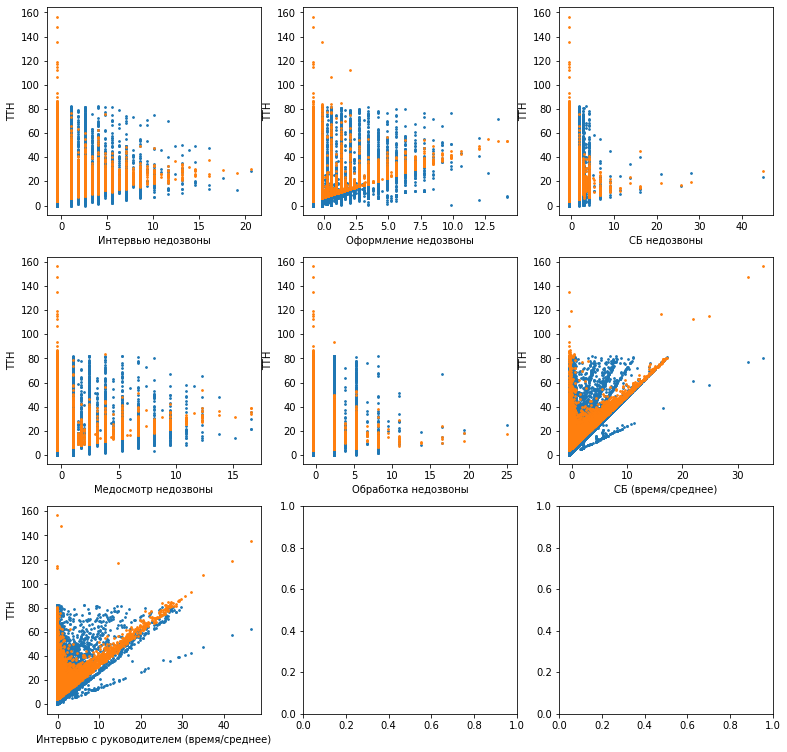

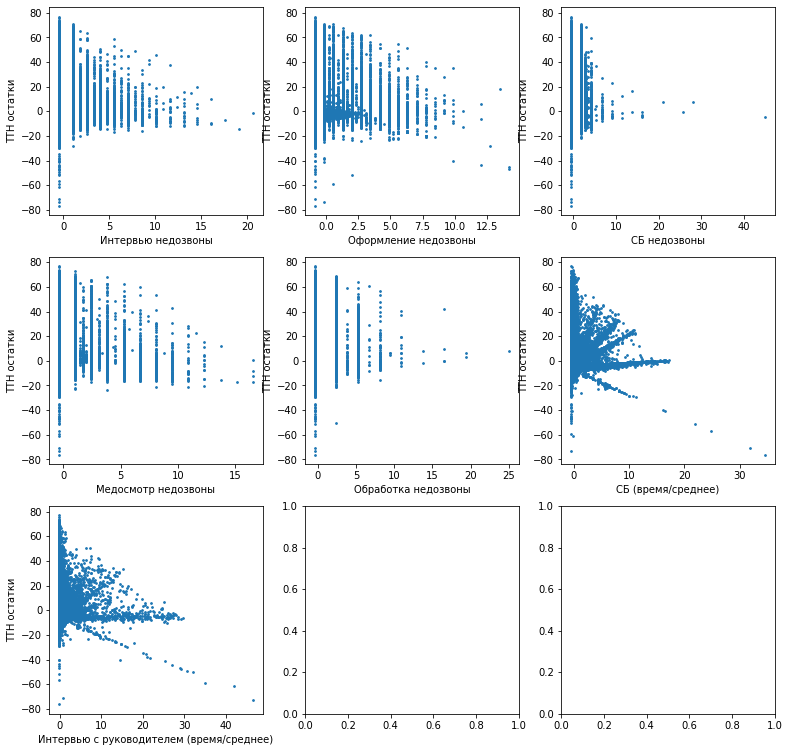

In [148]:
# xy = 3
not_column = []
for column in xColumn:
    if 'month' in column:
        not_column.append(column)
not_column.append('Reserv')
mask = np.isin(xColumn, not_column, invert = True)
viz_column = xColumn[mask]

vizScatTTHPred(df_reg, predicted, viz_column, yColumn)
vizResTTHPred(df_reg,predicted,viz_column,yColumn)

In [584]:
df_reg[viz_column].columns

Index(['mean_over_2calls', 'СБ (время)', 'СБ (на стадии/всего)',
       'СБ (время/среднее)', 'Интервью с руководителем (время/среднее)',
       'Обработка % от среднего'],
      dtype='object')

In [604]:
from sklearn import linear_model
from sklearn import metrics

classifiers = [
    linear_model.BayesianRidge(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

# for classifier in classifiers:
#     classifier.fit(X_train, Y_train)
#     Y_pred = classifier.predict(X_test)
#     print(metrics.r2_score(Y_test, Y_pred))

In [605]:
classifier = linear_model.ARDRegression()
reg_results = classifier.fit(X_train, Y_train)
reg_coef = pd.DataFrame(data=classifier.coef_, index = xColumn)
reg_coef.sort_values(by=[0], ascending=[False], inplace = True)
print(reg_coef)

                                                   0
Интервью с руководителем (время/среднее)  119.577785
Обработка % от среднего                   100.176197
СБ (время)                                 64.846851
СБ (время/среднее)                         64.846851
mean_over_2calls                           49.254610
СБ (на стадии/всего)                      -10.130951
month 11                                  -34.927538
month 10                                  -38.676210
month 2                                   -40.022940
month 6                                   -40.317100
month 7                                   -40.433829
month 5                                   -40.511505
month 1                                   -40.852974
month 8                                   -41.278073
month 3                                   -41.328766
month 9                                   -41.927333
month 4                                   -42.293945


In [606]:
# x_ax = range(len(Y_test))
# X_test_c = sm.add_constant(X_test)
# Y_pred = fitted_model.predict(X_test_c)
# plt.subplots(figsize=(13,13))
# plt.scatter(x_ax, Y_test, linewidth=1, label="original",s=5)
# plt.scatter(x_ax, Y_pred, linewidth=1.1, label="predicted",s=5)
# plt.title("y-test and y-predicted data")
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
# plt.show() 

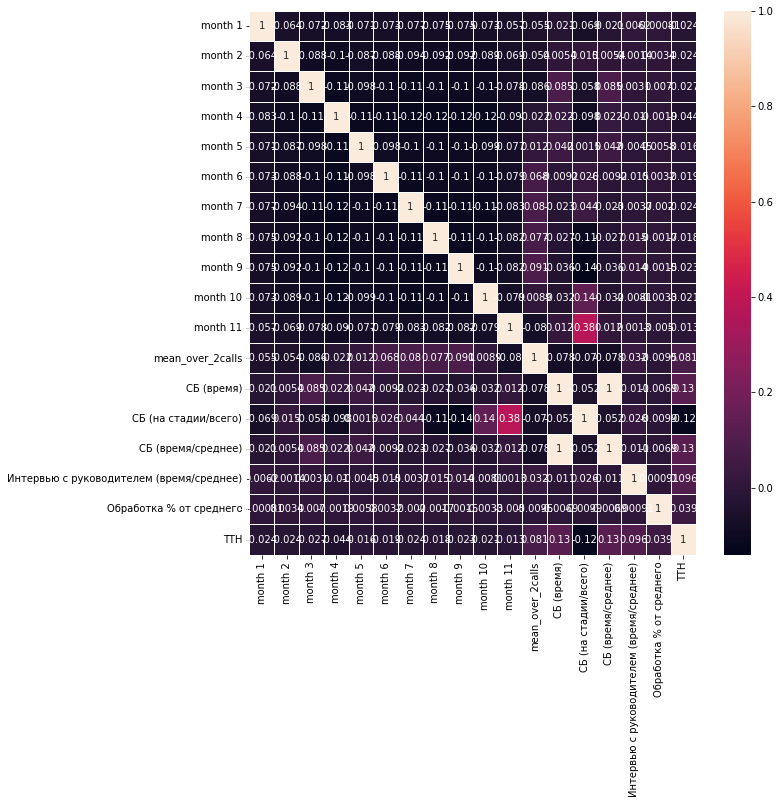

In [563]:
import seaborn as sns
plt.subplots(figsize=(10,10))
sns.heatmap(df_reg[np.append(xColumn,yColumn)].corr(),annot=True,linewidths = 1)
plt.show()

In [46]:
df_tth

,id_applicant,id_partner,department_id,TTH
0,2196746,2393754,6715,27.685659
1,2196747,2314693,12252,6.133310
2,2196748,2346300,5760,28.251127
3,2196752,2393757,32391,17.202996
4,2196753,2393758,32156,10.153854
...,...,...,...,...
193762,4886560,1197774,35106,0.000151
193763,4886575,1542748,28162,0.000176
193764,4886579,3878216,10530,0.000182
193765,4886599,3884467,48259,0.000218


In [47]:
stages_g =  df_norm.dropna(subset=['action_time']).groupby(['stage_name'])['action_time'].describe() # ['stage_name', 'activity_name']
stages_g['sum'] = stages_g['mean'] * stages_g['count']
stages_g

,count,mean,std,min,25%,50%,75%,max,sum
stage_name,,,,,,,,,
Выход на работу,156.0,1.078194,2.533568,0.000000,0.000000,0.004620,1.185274,21.760230,168.198321
Гайд-интервью,4.0,0.000011,0.000002,0.000009,0.000010,0.000011,0.000012,0.000013,0.000044
Групповое собеседование и тестирование,6.0,0.000010,0.000002,0.000007,0.000009,0.000010,0.000012,0.000013,0.000062
Интервью с руководителем,470750.0,0.554103,9.122335,0.000000,0.000008,0.000011,0.000015,618.209540,260843.799030
Кадровый резерв,4.0,0.000013,0.000011,0.000007,0.000008,0.000009,0.000014,0.000030,0.000054
Мы отказали,22.0,0.308741,1.448064,0.000006,0.000008,0.000012,0.000015,6.792035,6.792300
Назначение времени на оформление/медосмотр,205262.0,2.538058,6.628507,0.000000,0.000106,0.803150,2.998456,430.056809,520966.805882
Не прошел СБ,382.0,0.022709,0.211153,0.000000,0.000009,0.000011,0.000014,3.742623,8.674995
Обработка,348531.0,0.163508,6.332038,0.000000,0.000009,0.000011,0.000014,565.056308,56987.699728


In [54]:
date = df_norm['action_date'].min().tzinfo.localize(pd.to_datetime(20200101, format='%Y%m%d'))
df_norm[df_norm['action_date']>date].groupby('stage_name')['action_time'].sum()

stage_name
Выход на работу                                   0.004620
Интервью с руководителем                       1100.755071
Назначение времени на оформление/медосмотр        0.000000
Не прошел СБ                                      0.000349
Обработка                                        13.074398
Отказался                                         0.000117
Оформление                                    19826.728125
СБ                                             4379.108289
Создание кандидата                                0.000000
Name: action_time, dtype: float64

In [55]:
# df_norm[df_norm['id_applicant']==4146514]

In [56]:
# df_norm[df_norm['activity_name']=='Узнать результаты медосмотра']

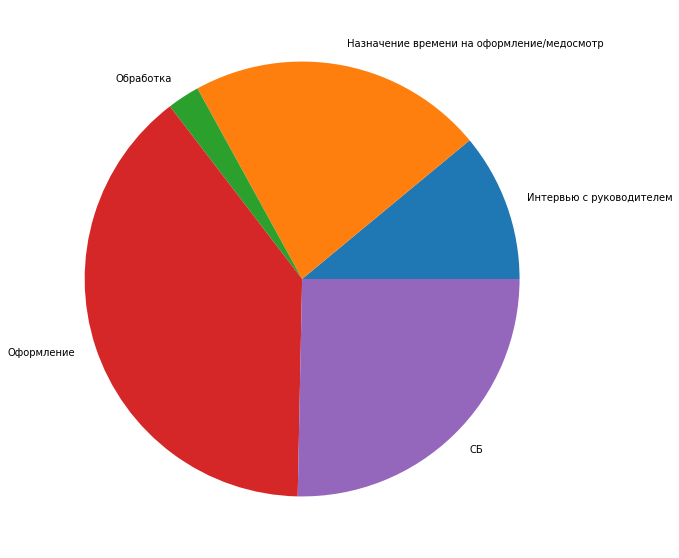

In [57]:
stage_pie_mask = stages_g['sum'] > 2200
stage_sum =stages_g[stage_pie_mask]['sum'].sum()
stage_sum

y = stages_g[stage_pie_mask]['sum'] / stage_sum
mylabels = stages_g[stage_pie_mask].index

plt.subplots(1, 1,figsize=(15,10))
plt.pie(y, labels = mylabels)
plt.show() 

In [58]:
# df_stage_activ = df_fits.dropna(subset=['action_time']).groupby(['stage_name', 'activity_name']).describe().reset_index
# df_stage_activ[]

In [59]:
# df_stage_result = df_fits.dropna(subset=['action_time']).groupby(['stage_name', 'result_name']).count().reset_index()
# df_stage_result[df_stage_result['stage_name']=='Оформление']

In [60]:

reserved_applicants = df.loc[df['result_name']=="Кадровый резерв", 'id_applicant'].unique()
reserved_applicants= np.append(reserved_applicants, df.loc[df['stage_name']=="Кадровый резерв", 'id_applicant'].unique())
reserved_applicants = np.append(reserved_applicants, df.loc[df['stage_name']=="Резерв", 'id_applicant'].unique())
reserved_applicants = np.unique(reserved_applicants)

In [61]:
sb_c = 1
int_c = 1
df_sb_int = df_fits[(df_fits['id_applicant'].isin(reserved_applicants))& ((df_fits['stage_name']=='СБ') | (df_fits['stage_name']=='Интервью с руководителем'))]
df_sb_int = df_sb_int.groupby(['id_applicant', 'stage_name'])['action_time'].sum().reset_index()
df_sb_int = pd.merge(df_sb_int[df_sb_int['stage_name'] == 'Интервью с руководителем'], df_sb_int[df_sb_int['stage_name'] == 'СБ'], how = 'outer', on="id_applicant")
df_sb_int['action_time_x(short)'] = df_sb_int['action_time_x']
df_sb_int.loc[(df_sb_int['action_time_x(short)']>sb_c), 'action_time_x(short)'] = sb_c
df_sb_int['action_time_y(short)'] = df_sb_int['action_time_y']
df_sb_int.loc[df_sb_int['action_time_y(short)']>int_c, 'action_time_y(short)'] = int_c
df_sb_int.rename(columns = {'action_time_x':'interview_time', 'action_time_x(short)':'interview_time(short)','action_time_y':'sb_time', 'action_time_y(short)':'sb_time(short)'}, inplace = True)
df_sb_int = df_sb_int.drop(['stage_name_x','stage_name_y'] , axis=1)
# df_sb_int.to_excel('reserved.xlsx')

In [62]:
# nedozvon = df_fits[['id_applicant','action_date', 'action_time']][(df_fits['result_name'] == 'Недозвон')]
# nedozvon['action_date'] = nedozvon['action_date'].dt.tz_localize(None)
# nedozvon.to_excel('Nedozvon.xlsx')
sum_time_med_c = 3
sum_time_medN_c = 3
sum_time_res_c = 3
df_med = df_fits[(df_fits['activity_name'] == 'Назначить время на оформление/медосмотр')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med.columns = df_med.columns.droplevel(1)
df_med = df_med.drop('activity_name', axis=1)
df_med.columns.values[1] = "sum_time_med"
df_med.columns.values[2] = "count_time_med"
print(len(df_med))
df_med2 = df_fits[(df_fits['activity_name'] == 'Назначить время на оформление/медосмотр (недозвон)')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med2.columns = df_med2.columns.droplevel(1)
df_med2 = df_med2.drop('activity_name', axis=1)
df_med2.columns.values[1] = "sum_time_medN"
df_med2.columns.values[2] = "count_time_medN"
print(len(df_med2))
df_med =  pd.merge(df_med, df_med2, how = 'outer', on="id_applicant")
df_med2 = df_fits.dropna(subset=['action_time'])[(df_fits['activity_name'] == 'Узнать результаты приема')].groupby(['activity_name', 'id_applicant']).agg({'action_time': ['sum','count']}).reset_index()
df_med2.columns = df_med2.columns.droplevel(1)
df_med2 = df_med2.drop('activity_name', axis=1)
df_med2.columns.values[1] = "sum_time_res"
df_med2.columns.values[2] = "count_time_res"
print(len(df_med2))
df_med =  pd.merge(df_med, df_med2, how = 'outer', on="id_applicant")
df_med['sum_time_med(short)'] = df_med['sum_time_med']
df_med.loc[(df_med['sum_time_med(short)']>sum_time_med_c), 'sum_time_med(short)'] = sum_time_med_c
df_med['sum_time_medN(short)'] = df_med['sum_time_medN']
df_med.loc[df_med['sum_time_medN(short)']>sum_time_medN_c, 'sum_time_medN(short)'] = sum_time_medN_c
df_med['sum_time_res(short)'] = df_med['sum_time_res']
df_med.loc[df_med['sum_time_res(short)']>sum_time_res_c, 'sum_time_res(short)'] = sum_time_res_c
# df_med.to_excel('med_time.xlsx')

185069
80014


C:\Users\Dmitry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


80988


In [63]:
results_g =  df_fits.dropna(subset=['action_time']).groupby(['result_name'])['action_time'].describe()
# results_g
results_g

,count,mean,std,min,25%,50%,75%,max
result_name,,,,,,,,
В белый список,4.0,0.000259,0.000101,0.000114,0.000234,0.000286,0.000310,0.000349
В ожидании,153482.0,3.158289,5.908128,0.000000,1.016673,1.918097,3.894268,520.710384
Время назначено,191517.0,1.840695,4.353546,0.000000,0.000073,0.000276,2.811733,291.880512
Встреча назначена,224659.0,0.594591,8.826268,0.000000,0.000009,0.000011,0.000015,600.796568
Интервью с руководителем,482.0,0.507145,5.623006,0.000016,0.000107,0.000176,0.000488,113.246137
Источник Яндекс Цифра,27.0,0.496732,1.423606,0.000011,0.000198,0.034347,0.086146,7.030999
Источник не Яндекс Цифра,45338.0,0.144579,5.950515,0.000000,0.000011,0.000013,0.000017,469.080663
Кадровый резерв,197.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Назначить время на оформление/медосмотр,3179.0,0.302307,2.244807,0.000000,0.000129,0.000187,0.000383,38.193814


In [64]:
activities_g =  df_fits.dropna(subset=['action_time']).groupby(['activity_name'])['action_time'].describe()
activities_g

,count,mean,std,min,25%,50%,75%,max
activity_name,,,,,,,,
Вернуть в воронку,8777.0,0.242731,2.267561e+00,0.000000,0.000062,0.000159,0.000346,113.246137
Вывести из черного списка,5.0,0.000208,1.429926e-04,0.000006,0.000114,0.000274,0.000297,0.000349
Назначить время для гайд-интервью,2.0,0.000012,7.476836e-07,0.000012,0.000012,0.000012,0.000012,0.000013
Назначить время на оформление,8211.0,1.034397,1.984597e+00,0.000000,0.000065,0.000233,1.043698,18.966384
Назначить время на оформление/медосмотр,218463.0,2.228467,5.390705e+00,0.000000,0.000131,0.221104,2.827222,430.056809
Назначить время на оформление/медосмотр (недозвон),124348.0,2.915728,7.302221e+00,0.000000,0.000071,0.809676,3.174616,392.058357
Назначить групповое собеседование и тестирование,2.0,0.000008,1.037589e-06,0.000007,0.000008,0.000008,0.000008,0.000009
Назначить интервью с руководителем,225710.0,0.617507,8.965768e+00,0.000000,0.000009,0.000011,0.000015,600.796568
Подготовить анкету кандидата,220390.0,1.376653,1.224314e+01,0.000000,0.000013,0.175961,0.832853,527.944208


In [65]:
df_new_tth = df_tth.reset_index(drop = True)
# df_med
df_new_tth = pd.merge(df_new_tth, df_med, how = 'left', on="id_applicant")
df_new_tth.fillna(0, inplace = True)
df_new_tth['TTH'] = df_new_tth['TTH'] - (df_new_tth['sum_time_med'] - df_new_tth['sum_time_med(short)'] + df_new_tth['sum_time_medN'] - df_new_tth['sum_time_medN(short)'] + df_new_tth['sum_time_res'] - df_new_tth['sum_time_res(short)'])
df_new_tth = df_new_tth[['id_applicant','TTH']] 

# df_sb_int
df_new_tth = pd.merge(df_new_tth, df_sb_int, how = 'left', on="id_applicant")
df_new_tth.fillna(0, inplace = True)
df_new_tth['TTH'] = df_new_tth['TTH'] - (df_new_tth['sb_time'] - df_new_tth['sb_time(short)'] + df_new_tth['interview_time'] - df_new_tth['interview_time(short)'])
df_new_tth = df_new_tth[['id_applicant','TTH']] 


# df_new_tth.to_excel('TTH_NEW.xlsx')
df_tth_new_dep =  df_fits.dropna(subset=['action_time']).groupby(['id_applicant', 'department_id'])['action_time'].count().reset_index()
df_tth_new_dep = df_tth_new_dep.join(df_new_tth.set_index('id_applicant'), on='id_applicant')
df_tth_new_dep = df_tth_new_dep.groupby(['department_id'])['TTH'].median().reset_index()
df_tth_new_dep.to_excel('TTH_DEP_NEW.xlsx')
df_tth_new_dep.describe()


,department_id,TTH
count,15550.000000,15550.000000
mean,22926.999293,5.504920
std,13317.867234,5.549973
min,5637.000000,0.000000
25%,9945.250000,4.521942
50%,24309.000000,5.315661
75%,32716.750000,6.270318
max,49859.000000,431.057327


In [77]:
quantile_dep = df_tth_dep['TTH_median'].quantile(.999)
quantile_dep

19.0

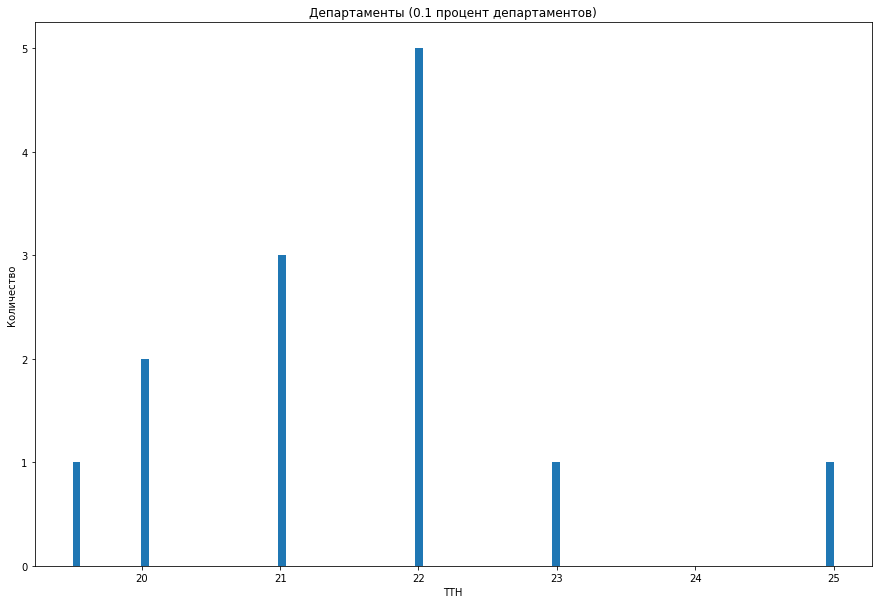

In [76]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 100
ax.hist(df_tth_dep['TTH_median'][(df_tth_dep['TTH_median']>quantile_dep)],bins=bins)
SetTTHLabels('Департаменты (0.1 процент департаментов)')
plt.show()

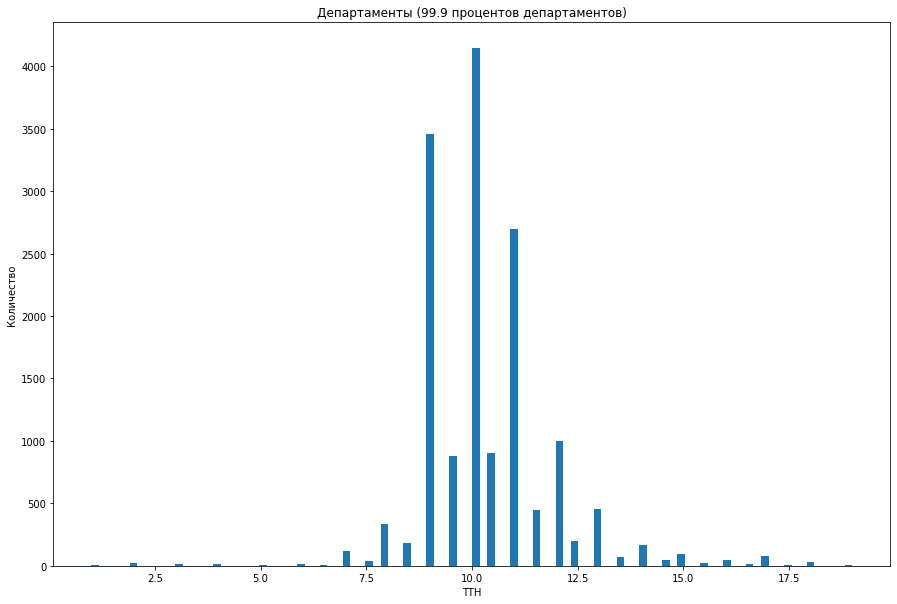

In [78]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 100
ax.hist(df_tth_dep['TTH_median'][(df_tth_dep['TTH_median']<=quantile_dep)],bins=bins)
SetTTHLabels('Департаменты (99.9 процентов департаментов)')
plt.show()

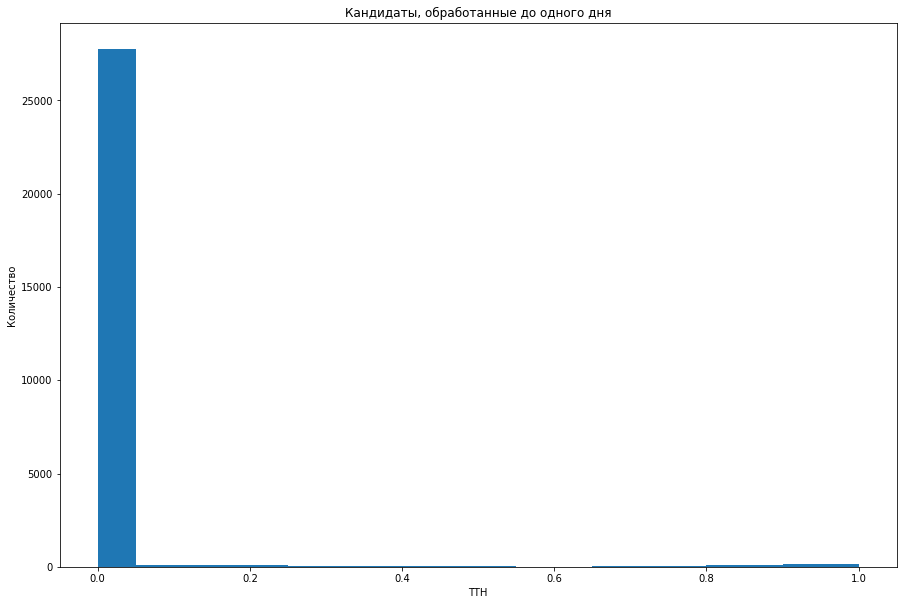

In [79]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
bins = 20
ax.hist(df_tth['TTH'][(df_tth['TTH']<=1)],bins=bins)
SetTTHLabels('Кандидаты, обработанные до одного дня')
plt.show()

In [ ]:
# df_fits[df_fits['id_applicant'] == 2205452]

In [84]:
# df_tth[(df_tth['TTH']<0.0001)]
quantile_tth = df_tth['TTH'].quantile(.99)
quantile_tth

82.14418599830046

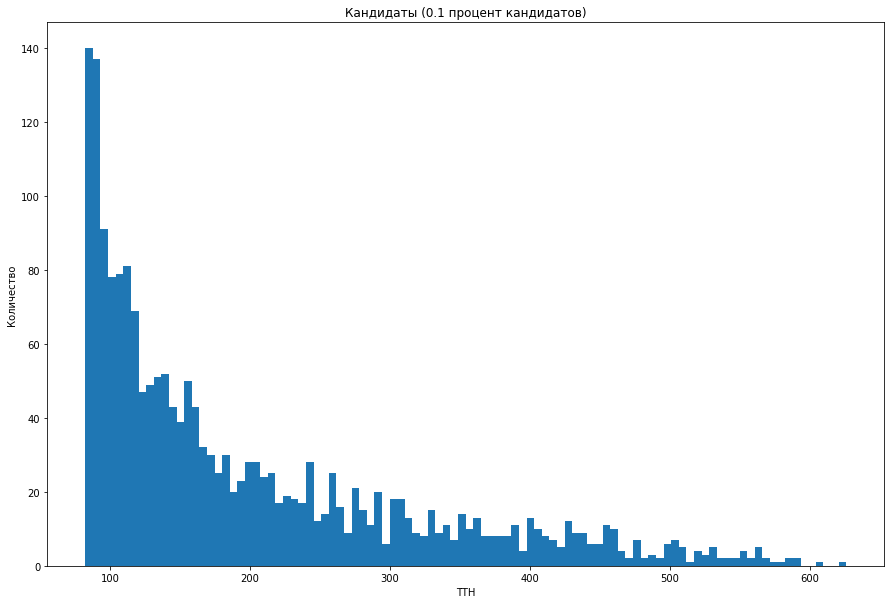

In [85]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.hist(df_tth['TTH'][(df_tth['TTH']<5000)&(df_tth['TTH']>quantile_tth)],bins=100)
SetTTHLabels('Кандидаты (0.1 процент кандидатов)')
plt.show()

In [86]:
# df_fits

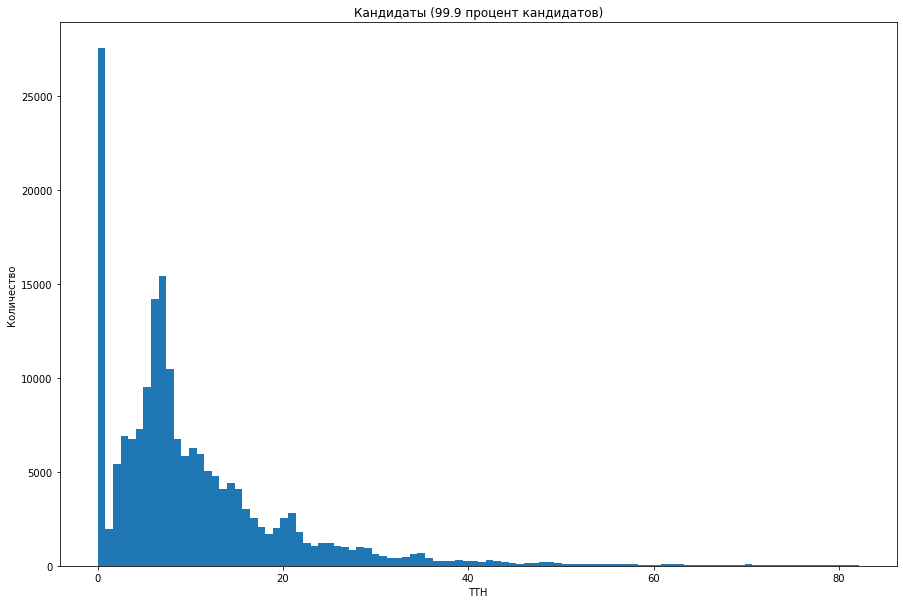

In [87]:
fig, ax = plt.subplots(1, 1,figsize=(15,10))
ax.hist(df_tth['TTH'][(df_tth['TTH']<quantile_tth)& (df_tth['TTH']>0)], bins = 100)
SetTTHLabels('Кандидаты (99.9 процент кандидатов)')
plt.show()

In [88]:
df_fits['action_time'].quantile(.999)

68.2677492796434

In [89]:
df_tth['TTH'][df_tth['TTH']>100]

78        473.820724
129       134.243540
174       533.154021
187       370.023845
312       173.923378
             ...    
149411    100.938892
150358    105.030456
151363    106.354237
151727    106.162903
153141    112.194402
Name: TTH, Length: 1551, dtype: float64

In [90]:
# stage_name = 'Интервью с руководителем'
# stage_series = df_fits['action_time'][df_fits['stage_name'] == stage_name]
# time_threshold = stages_g.loc[stage_name]['75%']

# df.iloc[stage_series[stage_series.values > time_threshold].index]

In [91]:
# amount_applicant =  df_fits.groupby(['id_partner','id_applicant']).size().reset_index()
# amount_applicant =  amount_applicant.groupby(['id_partner'])['id_applicant'].count().reset_index()
# amount_applicant[amount_applicant['id_applicant']>3]

In [92]:
# df.iloc[df[df['stage_name'] == 'Групповое собеседование и тестирование'].index+1]
# print(len(stages[stages['count'] > stage_threshold]))
# df.iloc[df[df['action_time'] < 0].index + 1]
# df[df['activity_name'] == 'Провести первичную обработку']

In [99]:
df_min_date =df_fits.groupby(['id_applicant'])['action_date'].min().reset_index()
df_cohort = pd.merge(df_tth, df_min_date, how = 'left', on="id_applicant")
df_cohort.rename(columns = {'action_date':'creation_date'}, inplace = True)
fits_min =  df_fits[df_fits['result_name'] == 'Принят'].groupby(['id_applicant'])['action_date'].max().reset_index()
df_cohort = pd.merge(df_cohort, fits_min, how = 'left', on="id_applicant")
df_cohort.rename(columns = {'action_date':'applied_date'}, inplace = True)
# df_cohort['applied_date'] = df_cohort['applied_date'].dt.tz_localize(None)
# df_cohort['creation_date'] = df_cohort['creation_date'].dt.tz_localize(None)
date2018 = df_cohort['applied_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_cohort['applied_date_days'] = (df_cohort['applied_date'] - date2018).dt.days % 365
df_cohort['creation_date_days'] = (df_cohort['creation_date'] - date2018).dt.days % 365

# df_cohort.to_excel('cohort_new.xlsx')

In [100]:
df_cohort

,id_applicant,id_partner,department_id,TTH,creation_date,applied_date,applied_date_days,creation_date_days
0,2196746,2393754,6715,27.685659,2018-01-05 06:37:15.434165+00:00,2018-02-01 23:04:53.450437+00:00,31,4
1,2196747,2314693,12252,6.133310,2018-01-05 06:37:54.019063+00:00,2018-01-11 09:51:21.213384+00:00,10,4
2,2196748,2346300,5760,28.251127,2018-01-05 06:39:55.362530+00:00,2018-02-02 12:41:49.992103+00:00,32,4
3,2196752,2393757,32391,17.202996,2018-01-05 06:50:30.704473+00:00,2018-01-22 11:43:14.342473+00:00,21,4
4,2196753,2393758,32156,10.153854,2018-01-05 06:50:31.727665+00:00,2018-01-15 10:32:20.674998+00:00,14,4
...,...,...,...,...,...,...,...,...
193762,4886560,1197774,35106,0.000151,2020-04-14 11:04:14.792897+00:00,2020-04-14 11:04:44.553692+00:00,104,104
193763,4886575,1542748,28162,0.000176,2020-04-14 11:06:05.368398+00:00,2020-04-14 11:06:42.313671+00:00,104,104
193764,4886579,3878216,10530,0.000182,2020-04-14 11:06:30.676429+00:00,2020-04-14 11:07:06.756809+00:00,104,104
193765,4886599,3884467,48259,0.000218,2020-04-14 11:07:46.024476+00:00,2020-04-14 11:08:17.306195+00:00,104,104


In [103]:
date2018 = df_cohort['applied_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
df_cohort['weeks'] = (df_cohort['applied_date'] - date2018).dt.days
df_cohort['weeks'] = (df_cohort['weeks'] % 365 / 7).astype(int)
df_cohort['TTH_int'] = (df_cohort['TTH']/7).astype(int)
# df_cohort[(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot = pd.DataFrame(df_cohort.pivot_table(index='weeks',
#                                         columns='TTH_int',
#                                         values='TTH',
#                                         aggfunc='count'))
# [(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot
# retention_pivot[1].plot()
# retention_pivot[1].index + 1



In [104]:
# retention_pivot = pd.DataFrame(df_cohort.pivot_table(index='weeks',
#                                         columns='TTH_int',
#                                         values='TTH',
#                                         aggfunc='count'))
# [(df_cohort['TTH_int']>0)&(df_cohort['TTH_int']<10)]
# retention_pivot.to_excel('cohort.xlsx')
# retention_pivot[1].plot()
# retention_pivot[1].index + 1

In [105]:
# retention_pivot[1]

In [109]:
# df_cohort['TTH_int'].max()
# pd.DataFrame(20180101)

# date = pd.to_datetime(20180101, format='%Y%m%d')
# date = df_cohort['applied_date'].min().tzinfo.localize(pd.to_datetime(20180101, format='%Y%m%d'))
# date
# df_cohort['action_date'].min().tzinfo

In [110]:
import matplotlib.pyplot as plt

def showHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    fig, axs = plt.subplots(xy, xy, figsize=(20,15))
    i = 0
    not_special_const = 5
    
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        time_threshold = not_special_const
        if is_special and col in grouped_data.index:
            time_threshold = grouped_data.loc[col]['75%']
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            i+=1
#             axs[x,y].set_ylabel('Кол-во')
            axs[x,y].set_xlabel(f'{col}, {col_len}')
            series[series.values < time_threshold].hist(ax=axs[x,y],bins=100)
        print('.', end = '')
    plt.show()

def checkShowHist(data, grouped_data, column_name = 'stage_name', col_threshold = 0, is_special = True, xy = 4):
    
    not_special_const = 5
    if is_special and len(data[column_name].unique()) != len(grouped_data):
        print('Not all columns in grouped_data')
    
    i = 0
    for col in data[column_name].unique():
        series = data['action_time'][data[column_name] == col]
        col_len = len(series)
    
        if col_len > col_threshold:
            x, y =divmod(i, xy)
            if x > xy or y > xy:
                print(f'Too many columns in data for diagramm {xy}*{xy}')                
            i+=1

.............

Exception ignored in: <function ZipFile.__del__ at 0x000001A7A384B1F8>
Traceback (most recent call last):
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\zipfile.py", line 1809, in __del__
    self.close()
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\zipfile.py", line 1826, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


...

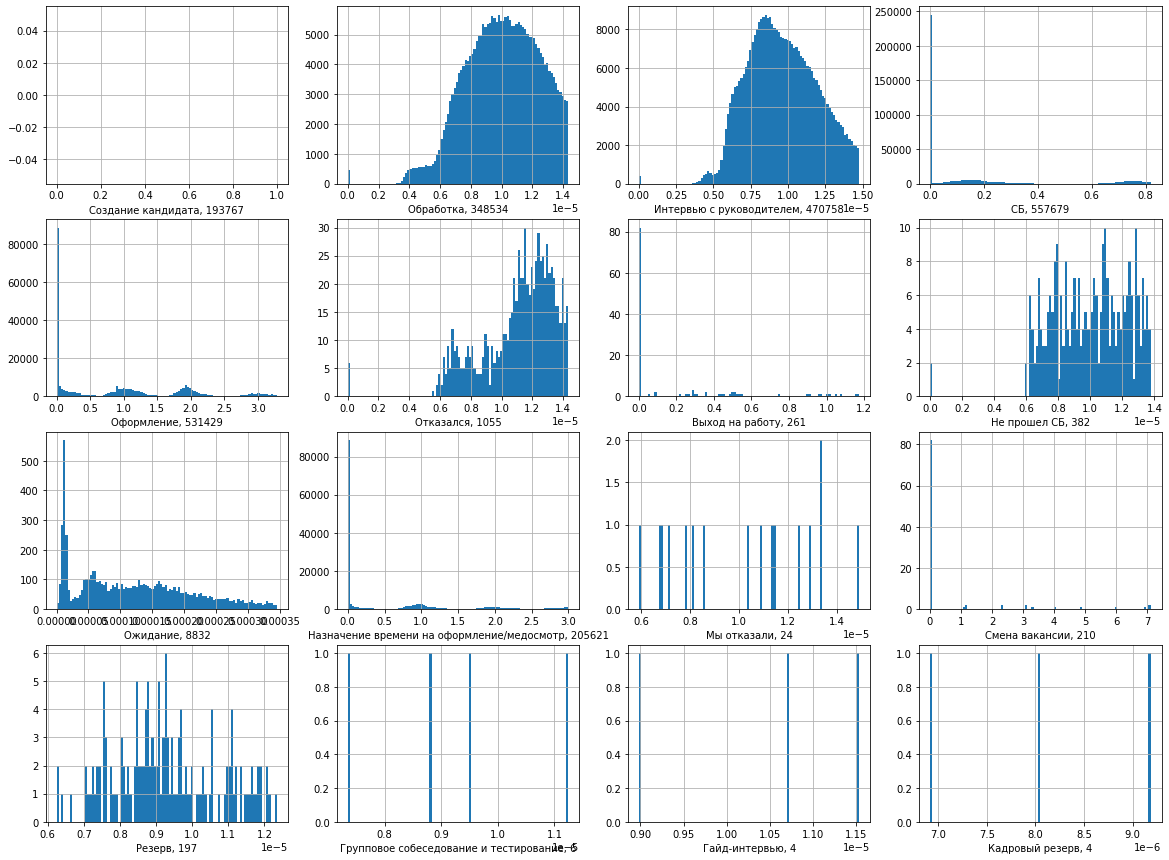

In [111]:
showHist(df_fits, stages_g, 'stage_name', stage_threshold)

.................

IndexError: index 4 is out of bounds for axis 0 with size 4

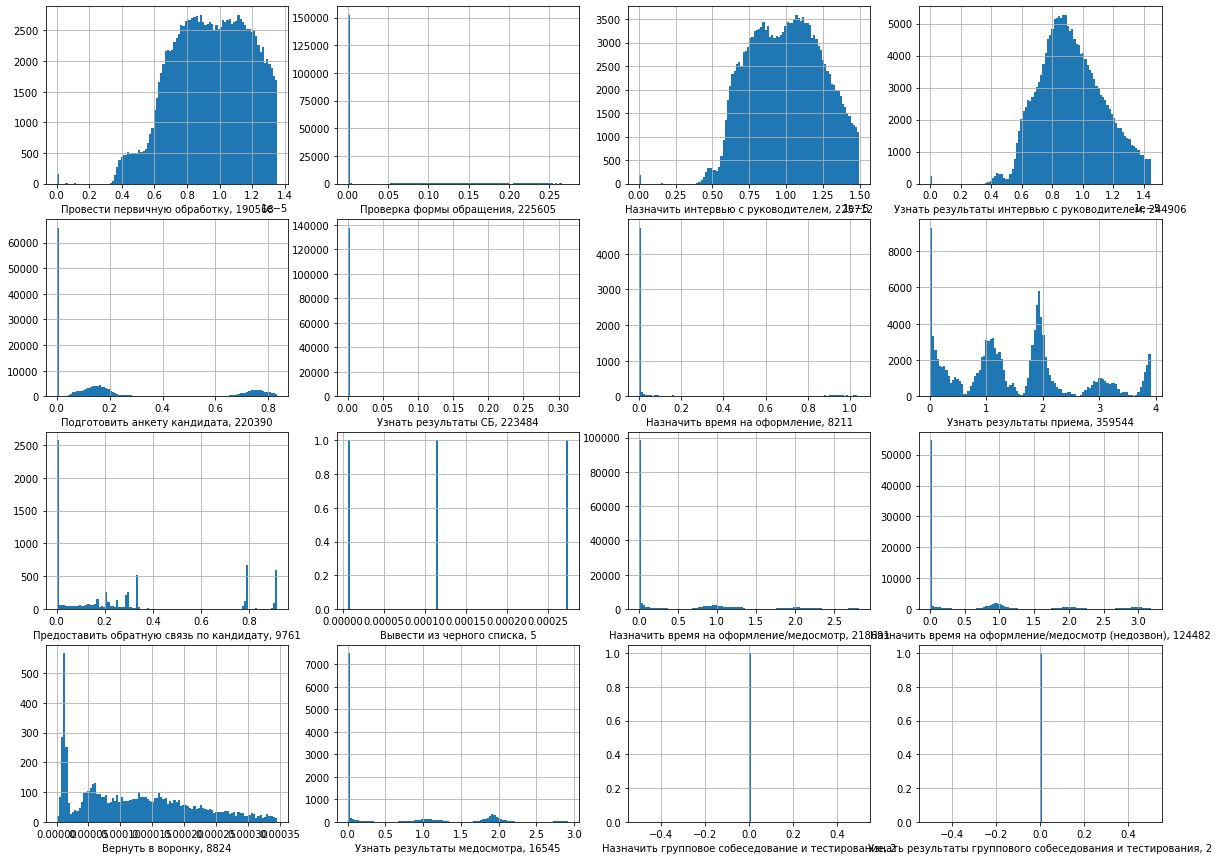

In [112]:
showHist(df_fits, activities_g, 'activity_name', activity_threshold, True)

.....................................

IndexError: index 6 is out of bounds for axis 0 with size 6

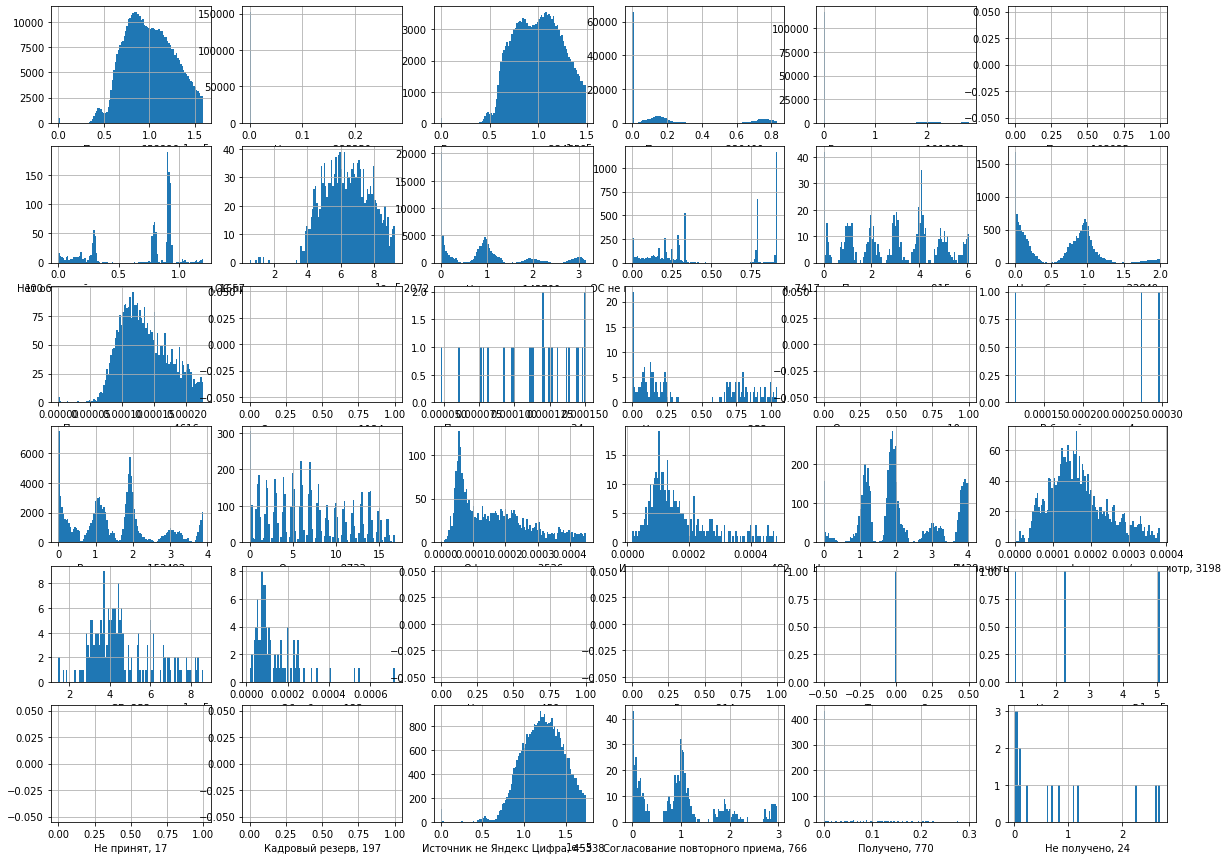

In [113]:
showHist(df_fits, results_g, 'result_name', result_threshold, True, 6)

# Замечание! 
заменить float значения колонки next_id на int

In [ ]:
#df2020["next_id"] = df2020["next_id"].astype(int) # пишет что не может NaN сконвертить в инт, тут надо подумать

In [ ]:
по stage_name других годов

In [ ]:
по stage_name 2020